<h1> Телекоммуникация </h>

Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах. Задача — обучить на этих данных модель для прогноза оттока клиентов.

# Описание услуг

Оператор предоставляет два основных типа услуг: 
- Стационарную телефонную связь. Телефон можно подключить к нескольким линиям одновременно.
- Интернет. Подключение может быть двух типов: через телефонную линию (***DSL***, от англ. digital subscriber line — «цифровая абонентская линия») или оптоволоконный кабель (***Fiber optic***).

Также доступны такие услуги:
- Интернет-безопасность: антивирус (***DeviceProtection***) и блокировка небезопасных сайтов (***OnlineSecurity***);
- Выделенная линия технической поддержки (***TechSupport***);
- Облачное хранилище файлов для резервного копирования данных (***OnlineBackup***);
- Стриминговое телевидение (***StreamingTV***) и каталог фильмов (***StreamingMovies***).

Клиенты могут платить за услуги каждый месяц или заключить договор на 1–2 года. Возможно оплатить счёт разными способами, а также получить электронный чек.

# Описание данных

Данные состоят из нескольких файлов, полученных из разных источников:
- `contract_new.csv` — информация о договоре;
- `personal_new.csv` — персональные данные клиента;
- `internet_new.csv` — информация об интернет-услугах;
- `phone_new.csv` — информация об услугах телефонии.

**Файл contract_new.csv**
- `customerID` — идентификатор абонента;
- `BeginDate` — дата начала действия договора;
- `EndDate` — дата окончания действия договора;
- `Type` — тип оплаты: раз в год-два или ежемесячно;
- `PaperlessBilling` — электронный расчётный лист;
- `PaymentMethod` — тип платежа;
- `MonthlyCharges` — расходы за месяц;
- `TotalCharges` — общие расходы абонента.

**Файл personal_new.csv**
- `customerID` — идентификатор пользователя;
- `gender` — пол;
- `SeniorCitizen` — является ли абонент пенсионером;
- `Partner` — есть ли у абонента супруг или супруга;
- `Dependents` — есть ли у абонента дети.

**Файл internet_new.csv**
- `customerID` — идентификатор пользователя;
- `InternetService` — тип подключения;
- `OnlineSecurity` — блокировка опасных сайтов;
- `OnlineBackup` — облачное хранилище файлов для резервного копирования данных;
- `DeviceProtection` — антивирус;
- `TechSupport` — выделенная линия технической поддержки;
- `StreamingTV` — стриминговое телевидение;
- `StreamingMovies` — каталог фильмов.

**Файл phone_new.csv**
- `customerID` — идентификатор пользователя;
- `MultipleLines` — подключение телефона к нескольким линиям одновременно.


Во всех файлах столбец `customerID` содержит код клиента. Информация о договорах актуальна на 1 февраля 2020 года.

# План работы:
1. Загрузим данные и выполним их первичный осмотр.
2. Выполним исследовательский анализ каждого датафрейма и при необходимости выполним предобработку. Сделаем выводы об имеющихся признаках: понадобятся ли они для обучения моделей.
3. Объединим выбранные признаки в один датафрейм по ключу.
4. Выполним исследовательский анализ объединённого датафрейма, визуализируем распределения признаков и при необходимости выполним предобработку. Проведем корреляционный анализ. Можно использовать не только имеющиеся признаки, но и генерировать новые.
5. Выполним подготовку данных для обучения модели. Разделим данные на две выборки, при масштабировании и кодировании необходимо учитывать особенности данных и моделей.
6. Обучим как минимум две модели. Хотя бы для одной из них подберем как минимум два гиперпараметра.
7. Выберем лучшую модель и проверим её качество на тестовой выборке.
8. Сделаем общий вывод о проделанной работе: опишем основные этапы работы, полученные результаты и дадим рекомендации для бизнеса.

## Загрузка данных и первоначальный взгляд

In [1]:
# Широкоформатный Jupyter
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [1]:
# установка

!pip3 install prettytable
!pip install phik

# обновим seborn
!pip install seaborn --upgrade

# обновим версию sklearn
!pip install scikit-learn --upgrade

     |████████████████████████████████| 294 kB 1.1 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1
     |████████████████████████████████| 10.9 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 66.1 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [2]:
# Импортируем базы данных, которые пригодятся в нашем исследование

# импорты из стандартной библиотеки
import warnings
import re
import os

# импорты сторонних библиотек
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from copy import deepcopy
from scipy import stats as st
import phik
# import optuna

# импорты модулей текущего проекта
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import Pool, CatBoostClassifier, cv
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, f1_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils import shuffle
from numpy.random import RandomState


from prettytable import PrettyTable
#import category_encoders as ce
#from category_encoders.m_estimate import MEstimateEncoder

# настройка
# игнорируем ошибки matplotlib
warnings.filterwarnings("ignore")

# Чтобы не появлялось предупреждение SettingWithCopy добавим в код строчку:
pd.options.mode.chained_assignment = None

# зафиксируем RandomState
STATE = np.random.RandomState(61123)

In [3]:
# Прочитаем файл 'contract_new' и сохраним в датафрейме

pth1 = 'contract_new.csv'
pth2 = '/datasets/contract_new.csv'

if os.path.exists(pth1):
    contract = pd.read_csv(pth1)
elif os.path.exists(pth2):
    contract = pd.read_csv(pth2)
else:
    print('Something is wrong')
    
    
# первый взгляд
print(f'Размер датафрейма {contract.shape}')
contract.head()

Размер датафрейма (7043, 8)


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [4]:
# Прочитаем файл 'personal_new' и сохраним в датафрейме

pth1 = 'personal_new.csv'
pth2 = '/datasets/personal_new.csv'

if os.path.exists(pth1):
    personal = pd.read_csv(pth1)
elif os.path.exists(pth2):
    personal = pd.read_csv(pth2)
else:
    print('Something is wrong')
    
    
# первый взгляд
print(f'Размер датафрейма {personal.shape}')
personal.head()

Размер датафрейма (7043, 5)


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
# Прочитаем файл 'internet_new' и сохраним в датафрейме

pth1 = 'internet_new.csv'
pth2 = '/datasets/internet_new.csv'

if os.path.exists(pth1):
    internet = pd.read_csv(pth1)
elif os.path.exists(pth2):
    internet = pd.read_csv(pth2)
else:
    print('Something is wrong')
    
    
# первый взгляд
print(f'Размер датафрейма {internet.shape}')
internet.head()

Размер датафрейма (5517, 8)


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [6]:
# Прочитаем файл 'phone_new' и сохраним в датафрейме

pth1 = 'phone_new.csv'
pth2 = '/datasets/phone_new.csv'

if os.path.exists(pth1):
    phone = pd.read_csv(pth1)
elif os.path.exists(pth2):
    phone = pd.read_csv(pth2)
else:
    print('Something is wrong')
    
    
# первый взгляд
print(f'Размер датафрейма {phone.shape}')
phone.head()

Размер датафрейма (6361, 2)


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Получилась следующая размерность в образовавшихся датафреймах:
- **contract** — 7043 строк, 8 столбцов;
- **personal** — 7043 строк, 5 столбцов;
- **internet** — 5517строк и 8 параметров;
- **phone** — 6361 строк и 2 параметра.

In [7]:
# Создадим функцию для облегчения дальнейшего знакомства с данными
def information(data):

# Посмотрим основную информацию датафрейма
    display(data.info(), data.describe(include='all').T.round(2))

# Посмотрим кол-во дубликатов
    print('Кол-во дубликатов', data.duplicated().sum())
    print('')

# Проверим кол-во пропусков в столбцах датафрейма
# Сделаем функцию, которая возвращает таблицу с количеством и долей пропусков в датафрейме
    def isna_info(df):
        isna_count = df.isna().sum() # кол-во пропусков
        # дублируем столбец с пропущенными значениями и высчитываем процент, объединяем таблицы
        isna_table = (pd.concat([isna_count / df.shape[0], isna_count], axis=1,  keys=['percent', 'count'])
        # сортируем по убыванию, удаляем из таблцы непропущенные значения              
           .sort_values('percent', ascending=False)).loc[lambda x: x["count"] > 0]
        return isna_table
    print('Кол-во параметров с пропусками в столбцах:', len(isna_info(data)), '\n'), display(isna_info(data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,0969-RGKCU,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BeginDate,7043,77,2014-02-01,366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EndDate,7043,67,No,5942,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,7043,3,Month-to-month,3875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaperlessBilling,7043,2,Yes,4171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaymentMethod,7043,4,Electronic check,2365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthlyCharges,7043.0,NaN,NaN,NaN,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
TotalCharges,7043,6658,,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Кол-во дубликатов 0

Кол-во параметров с пропусками в столбцах: 0 



,percent,count


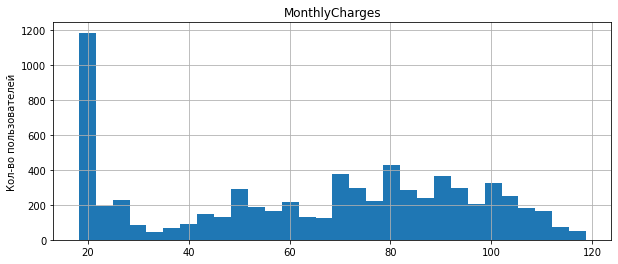

In [9]:
# Посмотрим информация по датасету "contract"
information(contract)

# Построим общую гистограмму для всех столбцов таблицы
contract.hist(figsize=(10, 4), bins=30)
plt.xlabel('')
plt.ylabel('Кол-во пользователей')
plt.show()

В датафрейме `contract` 7 тысяч строк, отсутствуют явные дубликаты и пропущенные значения в столбцах. Наименования столбцов не соблюдены по правилам написания кода PEP8: приведем названия к нижнему регистру и разделим подчеркиванием. 

Во всех столбцах, кроме столбца "расходы за месяц", тип данных `object`. При этом столбцы:
- "customerID" (идентификатор абонента) - показывает уникальный номер клиента, приведем его к целочисленному формату;
- "BeginDate" (дата начала действия договора) - отображают временной показатель, приведем его на "datetime64";
- "EndDate" (дата окончания действия договора) - имеет 2 показателя: 
  - "No" - если клиент продолжает пользовать услугами
  - дата окончания договора: если клиент ушел из компании
  
  Из данного показателя мы можем выделить наш **целевой признак** разделив столбец на два: ушел\не ушел и дата окончания договора;
- "Type" (тип оплаты) - имеет 3 показателя: "Month-to-month", "One year" и последний, скорее всего "Two year", в дальнейшем можно заменить на формат "category" или использовать кодирование;
- "PaperlessBilling" (электронный расчётный лист) - так же категориальный признак. Имеет два показателя: да\нет, можно перевести в формат "category", "bool" или "int" (заменив да\нет на 0\1);
- "PaymentMethod" (тип платежа) - еще один категориальный признак с 4 показателями: "Electronic check", "Mailed check", "Bank transfer (automatic)" и последний показатель, также связанный с типом оплаты (посмотрим его в дальнейшем);
- "MonthlyCharges" (расходы за месяц) - единственный столбец в формате числа с плавающей точкой;
- "TotalCharges" (общие расходы абонента) - необходимо привести в числовому формату. Но при этом чаще всего встречается пустое значение.

Относительно гистограммы можно сказать следующее: она у нас получилась одна из-за типа формата столбцов - "object". Единственная гистограмма показывает статистическое распределение кол-ва пользователей в зависимости от их расходов за месяц. Так мы видим, что пик пользователей находится минимальном значение расходов, в районе 20. Минимальная сумма расходов у клиентов равна 18.25. Дальше мы видим "просадку" по расходам от ~25 до ~45. Примерно равномерное распределение заметно в диапазоне от 70 до 100 с мини-пиками на каждом 10-кратном шаге, возможно пакеты тарифом сконфигурированы так, что бы стоимость была на более "круглой" цифре. Средний показатель расходов отличается от медианы на 5,5 единиц.

<u>Относительно категориальных признаков:</u> *для дальнейших исследований и построений моделей можно будет (даже необходимо) использовать "Encoding" (кодирование категориальных признаков), так что "изменение" типа данных в "Type", "PaperlessBilling" и "PaymentMethod" произойдет при "энкодинге". Над вариантом кодирования подумаем: скорее всего "ОНЕ", так как категорий в признаках у нас не много.*

Датафрейм с информацией о договоре.

In [10]:
# посмотрим на 4 показатель типа платежа
print(contract['PaymentMethod'].value_counts(), '\n')

# и 3 показатель типа оплаты 
print(contract['Type'].value_counts())

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64 

Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64


Как и говорили: 3 вариант "Type" это "Two year", а 4 вариант для "PaymentMethod" - "Credit card (automatic)".

Так же по кол-му распределению можно заметить, что для "PaymentMethod" плюс-минус равномерное распределение, а вот для "Type" - нет, но детальнее посмотрим дальше.

In [11]:
# посмотрим значения общих расходов, для понимания дальнейшего перевода в числовой формат.
contract['TotalCharges'].head(10)

0      31.04
1    2071.84
2     226.17
3     1960.6
4      353.5
5    1150.96
6    2058.21
7     300.48
8    3573.68
9    1628.35
Name: TotalCharges, dtype: object

Посмотрим поверхностно остальные датафреймы и после этого уже перейдем к преобразованиям.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,0969-RGKCU,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Кол-во дубликатов 0

Кол-во параметров с пропусками в столбцах: 0 



,percent,count


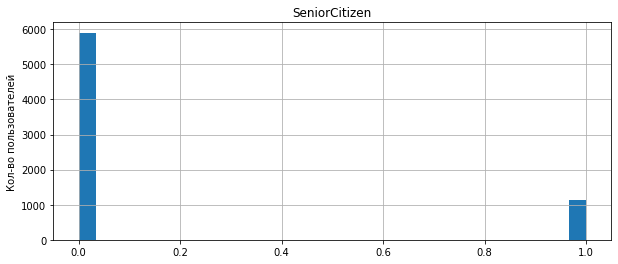

In [12]:
# Посмотрим информация по датасету "personal"
information(personal)

# Построим общую гистограмму для всех столбцов таблицы
personal.hist(figsize=(10, 4), bins=30)
plt.xlabel('')
plt.ylabel('Кол-во пользователей')
plt.show()

Так же как и в датафрейме `contract` у нас 7 тысяч строк, отсутствуют явные дубликаты и пропущенные значения в столбцах. Наименования столбцов не соблюдены по правилам написания кода PEP8.

В данном датафрейме все столбцы имеют категориальные значения:
- "customerID" (идентификатор пользователя) - столбец взаимосвязи с датафреймом "contract";
- "gender" (пол) - мужской\женский;
- "SeniorCitizen" (является ли абонент пенсионером) - столбец в целочисленном формате, где 1 - является, 0 - нет. По распределению мы видим, не пенсионеров примерно в 6 раз больше;
- "Partner" (есть ли у абонента супруг или супруга) - yes\no;
- "Dependents" (есть ли у абонента дети) - yes\no.

В данном датафрейме исползуется персональная информация о клиенте.

In [13]:
# Посмотрим информация по датасету "internet"
information(internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

,count,unique,top,freq
customerID,5517,5517,8232-CTLKO,1
InternetService,5517,2,Fiber optic,3096
OnlineSecurity,5517,2,No,3498
OnlineBackup,5517,2,No,3088
DeviceProtection,5517,2,No,3095
TechSupport,5517,2,No,3473
StreamingTV,5517,2,No,2810
StreamingMovies,5517,2,No,2785


Кол-во дубликатов 0

Кол-во параметров с пропусками в столбцах: 0 



,percent,count


В данном датафрейме уже 5,5 тысяч строк, также отсутствуют явные дубликаты и пропущенные значения в столбцах. Наименования столбцов не соблюдены по правилам написания кода PEP8.

Все данные у нас бинарные:
- "customerID" (идентификатор пользователя) - уже знакомый нам признак;
- "InternetService" (тип подключения) - [Fiber optic](https://thecode.media/fiber-optic/) и [DS](https://ip-calculator.ru/blog/ask/dsl/). При это по нашим данным оптическое волокно встречается у 3096 клиентов;
- "OnlineSecurity" (блокировка опасных сайтов) - yes\no. У 3498 человек данная опция отсутствует;
- "OnlineBackup" (облачное хранилище файлов для резервного копирования данных) - yes\no. У 3088 не подключена данная функция;
- "DeviceProtection" (антивирус) - yes\no. 3095 человек не подключали антивирус;
- "TechSupport" (выделенная линия технической поддержки) - yes\no. 3473 не используют выделенную линию;
- "StreamingTV" (стриминговое телевидение) - yes\no. 2810 клиента не используют опцию стримингового тв;
- StreamingMovies" (каталог фильмов) - yes\no. У 2785 человек данная опция отсутствует.

Данный датафрейм представляет из себя список клиентов, использующих интернет, как услугу компании, а также каталог дополнительных опций для клиента. При этом в датафрейме на ~1500 изначальных пользователей (customerID) меньше. Следовательно, в данной выгрузке у нас представлены только те клиенты, которые пользуется интернетом от нашей компании и пакетом опций. В дальнейшем пропуски, возникшие при объединение всех данных, можем заменить на "no", т.к. клиенты не используют данные услуги.

Гистограмму не выводим потому что все данные "object".

In [14]:
# Посмотрим информация по последнему датасету "phone"
information(phone)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

,count,unique,top,freq
customerID,6361,6361,0969-RGKCU,1
MultipleLines,6361,2,No,3390


Кол-во дубликатов 0

Кол-во параметров с пропусками в столбцах: 0 



,percent,count


Итак, в данному датафрейме представлены клиенты, которые пользуются услугой телефонии от нашего оператора. Таких людей у нас 6361, при этом 3390 человек используют опцию "MultipleLines" — подключение телефона к нескольким линиям одновременно (так же бинарный признак). 

И по уже сформировавшейся традиции: явные дубликаты и пропущенные значения в столбцах отсутствуют. Наименования столбцов не соблюдены по правилам написания кода PEP8, а "customerID" все тот же идентификатор клиента.

**Подвывод данного блока:**

- Мы посмотрели поверхностно основную информацию в наших датафреймах. Пропуски и дубликаты не выявлены, при этом понимаем, что пропуски возникнут при объединение данных, но возникновение пропуска ясно, что если значение "не заполнено" - то клиент, не использует данную услугу;
- У нас маленькая выборка, всего 7043 значения;
- Необходимо переименовать столбцы и изменить тип данных в некоторых столбцах;
- Поняли наш **целевой признак**, осталось его вынести в отдельный столбец;
- Поняли необходимость использования энкодинга для категориальных признаков;
- С помощью двух столбцов, отображающих временные показатели, можем определить продолжительность использования услуг клиентом.

**Итак, принимаем решение чуть изменить изначальный план работы:** 

**Сначала мы объединим данные, а затем проведем исследовательский анализ и предобработку данных. Данное изменение в анализ данных нам не внесет.**

## Объединение данных. Исследовательский анализ и предобработка данных

In [15]:
# Для начала объединим данные
full_data = contract.merge(personal, how='left', on='customerID') \
    .merge(internet, how='left', on='customerID') \
    .merge(phone, how='left', on='customerID') 

# посмотрим
print(full_data.shape)
full_data.head(2)

(7043, 20)


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No


Кол-во строк такое же, как и в датафреймах "contract" и "personal"

In [16]:
# Для удобства работать будем в копии базы, что бы всегда можно что-то сравнить с оригиналом
# копию базы назовем 'data'
data = deepcopy(full_data)
data.sample(3)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
871,1573-LGXBA,2015-05-01,2019-07-01,One year,Yes,Credit card (automatic),97.55,4877.5,Male,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,No
6629,6437-UDQJM,2014-02-01,No,Two year,Yes,Credit card (automatic),84.10,6055.2,Female,1,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Yes
5143,5204-HMGYF,2016-01-01,No,One year,Yes,Mailed check,87.20,4529.17,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,No


In [17]:
# Переименуем столбцы по правилам написания кода PEP8
data.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in data.columns]
list(data.columns)

['customer_i_d',
 'begin_date',
 'end_date',
 'type',
 'paperless_billing',
 'payment_method',
 'monthly_charges',
 'total_charges',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_t_v',
 'streaming_movies',
 'multiple_lines']

Вышла ошибочка с `customer_id` и `streaming_tv` - исправим в ручную :)

In [18]:
data = data.rename(
    columns = {'customer_i_d': 'customer_id', 
    'streaming_t_v': 'streaming_tv'}
) 

In [19]:
# Проверим на уникальность все значения идентификатор абонента
data['customer_id'].is_unique

True

Отлинчно, уникальность True.

Добавим наш целевой признак и назовем его `exited`. Если значение в столбце `end_date` равняется "No", то клиент не ушел, продолжает пользоваться услугами оператора. **Целевой признак** в данном случае **равен 0**. Для тех, **кто ушел = 1**

In [20]:
# добавляем целевой признак
data['exited'] = (data['end_date'] != 'No').astype(int)
data.sample(5)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,exited
5093,2676-SSLTO,2016-01-01,No,Two year,Yes,Bank transfer (automatic),66.15,3403.42,Male,0,...,No,DSL,No,No,No,Yes,Yes,No,Yes,0
1342,2017-CCBLH,2019-06-01,No,Two year,No,Mailed check,20.00,171.2,Female,0,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0
2372,0730-BGQGF,2014-03-01,2017-10-01,Two year,No,Credit card (automatic),90.30,3882.9,Male,0,...,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Yes,1
5387,8676-OOQEJ,2019-10-01,No,Month-to-month,No,Electronic check,30.50,122.0,Male,0,...,No,DSL,No,No,No,Yes,No,No,NaN,0
3888,6086-ESGRL,2019-11-01,No,Month-to-month,No,Credit card (automatic),80.15,257.28,Female,0,...,No,Fiber optic,No,No,No,No,No,Yes,No,0


Так как нам известно, что информация о договорах актуальна на 1 февраля 2020 года, то теперь, значение "No" в столбце `end_date` заменим на эту дату.

In [21]:
# меняем
data['end_date'] = data['end_date'].replace(['No'], ['2020-02-01'])

# смотрим
data[data['end_date'] == 'No']

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,exited


Вернемся к замене типа данных в датафрейме:
- "begin_date" и "end_date" к формату даты;
- "total_charges" к формату float. Но помним, что у нас есть 11 "пустых" значений в данном столбце;
- "senior_citizen" можно перевести в формату object, что бы все категориальные признаки у нас были в данном формате;
- "customer_id" можно не приводить к целочисленному формату, как говорил ранее, т.к. данный столбец не даст никаких результатов при обучение модели предсказания (уникальные идентификаторы). Можем данный столбец установить в качестве индекса.

In [22]:
# Вспомним в каких столбцах пропуски, что бы при замене данных не возникало ошибок
data.isna().sum()

customer_id             0
begin_date              0
end_date                0
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
multiple_lines        682
exited                  0
dtype: int64

In [23]:
# Заменим тип данных в столбцах 
def type_replacement(column, data_type):
    data[column] = data[column].astype(data_type)
    # Посмотрим
    print(data[column].dtypes, '\n')

type_replacement(['begin_date', 'end_date'], 'datetime64[ns]')
type_replacement(['senior_citizen'], 'object')

# для total_charges воспользуемся переводом значений столбца из строкового типа str в вещественный тип float с значением errors='coerce',
#  в этом случае некорректные значения принудительно заменяются на NaN;
data['total_charges'] = pd.to_numeric(data['total_charges'], errors ='coerce')
print('Количество пропусков в total_charges:', data['total_charges'].isna().sum())

begin_date    datetime64[ns]
end_date      datetime64[ns]
dtype: object 

senior_citizen    object
dtype: object 

Количество пропусков в total_charges: 11


In [24]:
# Посмотрим, на пропуски в столбце
data[data['total_charges'].isnull()]

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,exited
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,NaN,Female,0,...,Yes,DSL,Yes,No,Yes,Yes,Yes,No,NaN,0
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,NaN,Male,0,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,NaN,Female,0,...,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No,0
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,NaN,Male,0,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,0
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,NaN,Female,0,...,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,NaN,0
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,NaN,Male,0,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,NaN,Male,0,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,0
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,NaN,Female,0,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,NaN,Male,0,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,0
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,NaN,Female,0,...,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Yes,0


Как видим, дата заключения договора и дата окончания, у клиентов с пропущенным значением в "total_charges", совпадает. Напрашивается вывод, что эти клиенты присоединились к оператору в день выгрузки информации о договорах из базы. Заменим пропуски на 0, скорее всего клиенты еще не оплачивали чек, потому что у всех абонентов, кроме одного, тип оплаты стоит "Раз в 2 года" (у одного абонента - "раз в год"). Следовательно оплата будет происходить по истечению данного срока или в день расторжения договора.

In [25]:
# заменяем пропуски
data['total_charges'] = data['total_charges'].fillna(0)
data['total_charges'].isnull().sum()

0

In [26]:
# Заменим значения столбца в senior_citizen

# смотрим актуальыне значения
data['senior_citizen'].value_counts(ascending=False, dropna=False)

0    5901
1    1142
Name: senior_citizen, dtype: int64

In [27]:
# меняем на уже стандартные yes\no
data['senior_citizen'] = data['senior_citizen'].replace(0, 'No').replace(1, 'Yes')

# смотрим новые значения
data['senior_citizen'].value_counts(ascending=False, dropna=False)

No     5901
Yes    1142
Name: senior_citizen, dtype: int64

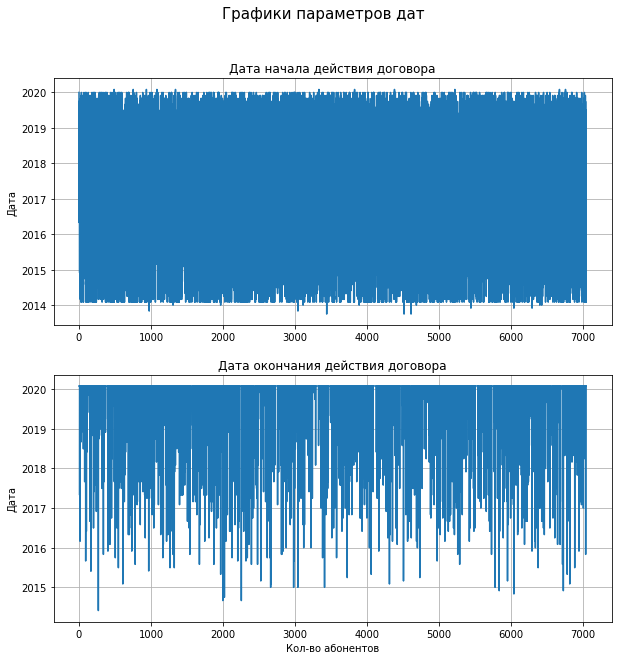

In [28]:
# посмотрим на информацию по столбцам с датами
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('Графики параметров дат', fontsize=15)
plt.xlabel('Кол-во абонентов')

data['begin_date'].plot(ax=axes[0], grid = True, title='Дата начала действия договора')
axes[0].set_ylabel('Дата')
data['end_date'].plot(ax=axes[1], grid = True, title='Дата окончания действия договора')
axes[1].set_ylabel('Дата')
plt.show()

В целом можно сказать, что подписание договора на оказания услуг оператором равномерно распределено среди всего срока, начиная с 2014 года, а так же тот момент, что в компании осталось больше клиентов, заключивших договор после 2018 года.

Итак, обладая такими данными, мы можем посчитать, сколько дней клиент провел в компании. Почему количество дней? Использовать кол-во лет и месяцев не совсем корректно, так как клиент может провести неполный год или месяц, к тому же, как мы видели выше, клиент может быть абонентом всего 1 день.

Добавим к датафрейму столбец `total_days` с кол-вом дней, которые человек является клиентом компании.

In [29]:
# находим разницу между begin_date и end_date
data['total_days'] = (data['end_date'] - data['begin_date']).dt.days
display(data.head())
data.dtypes

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,exited,total_days
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,Female,No,...,DSL,No,Yes,No,No,No,No,NaN,0,31
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,Male,No,...,DSL,Yes,No,Yes,No,No,No,No,0,1036
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,Male,No,...,DSL,Yes,Yes,No,No,No,No,No,0,123
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,Male,No,...,DSL,Yes,No,Yes,Yes,No,No,NaN,0,1371
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,Female,No,...,Fiber optic,No,No,No,No,No,No,No,0,153


customer_id                  object
begin_date           datetime64[ns]
end_date             datetime64[ns]
type                         object
paperless_billing            object
payment_method               object
monthly_charges             float64
total_charges               float64
gender                       object
senior_citizen               object
partner                      object
dependents                   object
internet_service             object
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
multiple_lines               object
exited                        int64
total_days                    int64
dtype: object

Итак: заменили типы данных и добавили 2 столбца: целевой и с кол-вом дней.

Теперь заполним пропуски в категориальных признаках значением "No", как мы определили ранее, если пропуск, то услуга не подключалась.

In [30]:
# убираем пропуски
for column in ('internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines'):
    data[column] = data[column].fillna('No')
    
data.isna().sum()    

customer_id          0
begin_date           0
end_date             0
type                 0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
gender               0
senior_citizen       0
partner              0
dependents           0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
multiple_lines       0
exited               0
total_days           0
dtype: int64

In [31]:
# установим "customer_id" как индекс датафрейма
data = data.set_index('customer_id')

In [32]:
# взгляд на собранный датафрейм
information(data)

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   begin_date         7043 non-null   datetime64[ns]
 1   end_date           7043 non-null   datetime64[ns]
 2   type               7043 non-null   object        
 3   paperless_billing  7043 non-null   object        
 4   payment_method     7043 non-null   object        
 5   monthly_charges    7043 non-null   float64       
 6   total_charges      7043 non-null   float64       
 7   gender             7043 non-null   object        
 8   senior_citizen     7043 non-null   object        
 9   partner            7043 non-null   object        
 10  dependents         7043 non-null   object        
 11  internet_service   7043 non-null   object        
 12  online_security    7043 non-null   object        
 13  online_backup      7043 non-null   object        
 14

None

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
begin_date,7043,77,2014-02-01 00:00:00,366,2013-10-01,2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
end_date,7043,67,2020-02-01 00:00:00,5942,2014-06-01,2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7043,3,Month-to-month,3875,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paperless_billing,7043,2,Yes,4171,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_method,7043,4,Electronic check,2365,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monthly_charges,7043.0,NaN,NaN,NaN,NaT,NaT,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
total_charges,7043.0,NaN,NaN,NaN,NaT,NaT,2115.312885,2112.742814,0.0,436.75,1343.35,3236.69,9221.38
gender,7043,2,Male,3555,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
senior_citizen,7043,2,No,5901,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
partner,7043,2,No,3641,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Кол-во дубликатов 4

Кол-во параметров с пропусками в столбцах: 0 



,percent,count


Все состыковалось: пропусков нет, типы данных заполнены корректно, название столбцов соответсвует PEP8.

In [33]:
# Для дальнейшего исследовательского анализа сделаем функцию для вывода уникальных значений, и сделаем разбивку на категориальные и численные признаки


# функция для посмотра кол-во тех или иных значений в столбцах, отсортировав по убыванию
def unique_values(value_column):
    for column in data[value_column]:
        print('Значения столбца ', column, 'и кол-во уникальных значений', data[column].nunique())
        print('')
        print(data[column].value_counts(ascending=False, dropna=False))
        print('')

        
# функция для круговой диаграммы
def pie_exited(columns, title, legend):
    colors = sns.color_palette("husl", 10)
    data.groupby([columns]).count().plot(kind='pie', y='exited', figsize=(7.5, 7.5), autopct='%0.01f%%', colors=colors, shadow=True)
    plt.title(title)
    plt.xlabel('Количество абонентов')
    plt.ylabel('')
    legend = plt.legend(title = legend,
                     title_fontsize = 15, bbox_to_anchor=(1, 1.02), loc='upper left')
    plt.show()        
        
        
# функция для столбчатого графика в зависимости от целевого признака
def countplot_exited(columns, title, xlabel, rotation):
    sns.set(rc={'figure.figsize':(7, 7)})
    order = sorted(data[columns].unique())
    ax = sns.countplot(x=columns, data=data, hue="exited", order=order)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.xticks(rotation=rotation)
    plt.ylabel('Количество абонентов')
    legend = plt.legend(['Остался', 'Ушел'], title = "Уход клиента:",
                     title_fontsize = 15, bbox_to_anchor=(1, 1.02), loc='upper left')

    bars = ax.patches
    half = int((len(bars)-2)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center", color = "green", fontstyle = "oblique")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center", color = "green", fontstyle = "oblique")
        
    totals = float(len(data))

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/totals)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y - 140), ha='center', va = 'center', color = "black")
    plt.show()
    
    
# сделаем список категориальных признаков
category_features = data.select_dtypes(include='object').columns.to_list()
print(f'Категориальные признаки: {category_features}')
print('')

# сделаем список численных признаков
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.to_list()
print(f'Численные признаки: {numeric_features}')

Категориальные признаки: ['type', 'paperless_billing', 'payment_method', 'gender', 'senior_citizen', 'partner', 'dependents', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines']

Численные признаки: ['monthly_charges', 'total_charges', 'exited', 'total_days']


**Построим графики для категориальных признаков и посмотрим процентное соотношение по признаку, а так же распределения по целевому значению.**

Значения столбца  exited и кол-во уникальных значений 2

0    5942
1    1101
Name: exited, dtype: int64

None


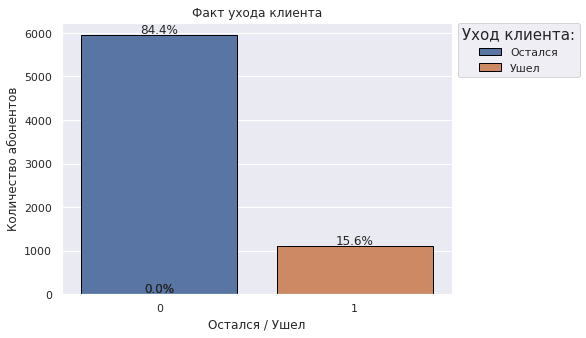

In [34]:
# целевой признак

print(unique_values(['exited']))

# Посмотрим на столбчатый график в зависимости от целевого признака
sns.set(rc={'figure.figsize':(7,5)})
ax = sns.countplot(data=data, x='exited', ec='black', hue='exited')
total = float(len(data))
plt.title('Факт ухода клиента')
plt.xlabel('Остался / Ушел')
plt.ylabel('Количество абонентов')
legend = plt.legend(['Остался', 'Ушел'], title = "Уход клиента:",
                     title_fontsize = 15, bbox_to_anchor=(1, 1.02), loc='upper left')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y+ 40), ha='center')
plt.show()

84,4% клиентов (5942 человека) осталось у оператора. Выборка неравномерна.

Значения столбца  type и кол-во уникальных значений 3

Month-to-month    3875
Two year          1695
One year          1473
Name: type, dtype: int64

None


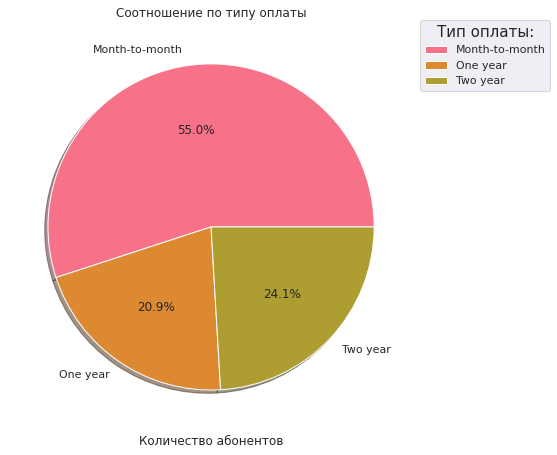

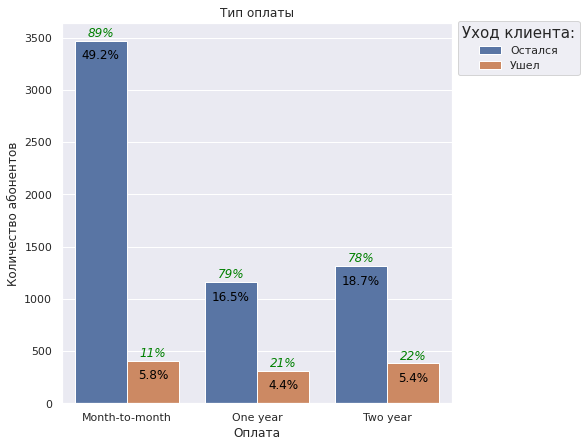

In [35]:
# тип оплаты: раз в год-два или ежемесячно

print(unique_values(['type']))
    
# Посмотрим на круговую диаграмму
pie_exited('type', 'Соотношение по типу оплаты', 'Тип оплаты:')

# Посмотрим на столбчатый график в зависимости от целевого признака
countplot_exited('type', 'Тип оплаты', 'Оплата', 0)    

У 55% клиентов (3875 человек) помесячная оплата, из них:
- 11% приходилось на ушедших клиентов (5,8% от общего числа клиентов по всему датафрейму);
- 89% на оставшихся.

У 21% (1473 человек) - ежегодная оплата, из них:
- 21% на ушедших (4,4% от общего числа клиентов по всему датафрейму);
- 79% на оставшихся. 

И у 24% (1695 человека) оплата раз в 2 года:
- 22% на ушедших (5,4% от общего числа клиентов по всему датафрейму);
- 78% на оставшихся. 

<b>`Тут и далее: 
    - зеленные цифры над столбиками означают распределение внутри определенной группы (к примеру: помесячная оплата: 89% клиентов осталось, 11% ушло), 
    - а черные цифры в столбиках означают процентное распределение клиентов относительно всего датафрейма`</b>

5,8% + 4,4% + 5,4% = 15,6%, что равно общему числу ушедших клиентов от оператора.

Значения столбца  paperless_billing и кол-во уникальных значений 2

Yes    4171
No     2872
Name: paperless_billing, dtype: int64

None


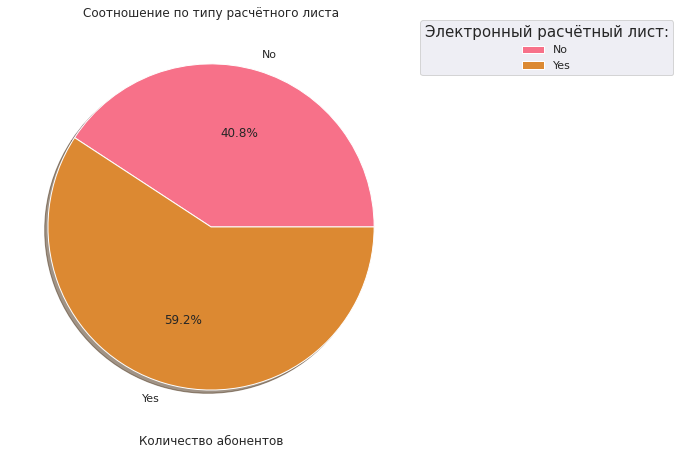

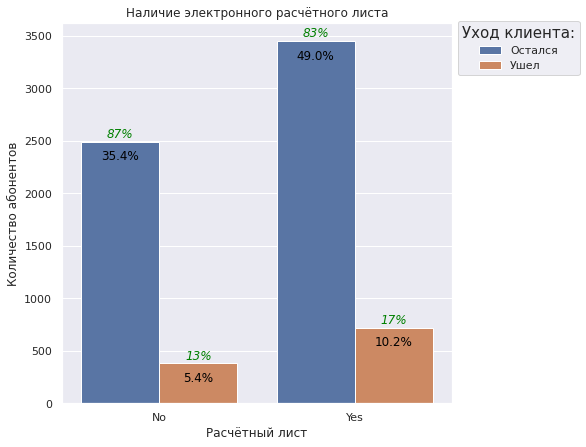

In [36]:
# электронный расчётный лист

print(unique_values(['paperless_billing']))

# Посмотрим на круговую диаграмму
pie_exited('paperless_billing', 'Соотношение по типу расчётного листа', 'Электронный расчётный лист:')

# Посмотрим на столбчатый график в зависимости от целевого признака
countplot_exited('paperless_billing', 'Наличие электронного расчётного листа', 'Расчётный лист', 0)    

59% клиентов (4171 человек) имеют электронный расчётный лист, из них:
- 17% ушли от оператора;
- 83% осталось.

У 41% (2872 человек) - нет электронного расчётного листа, из них:
- 13% ушли от оператора;
- 87% осталось. 

Ушедших клиентов с эл. расчетным листом на почти в 2 раза больше, чем без него.

Значения столбца  payment_method и кол-во уникальных значений 4

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: payment_method, dtype: int64

None


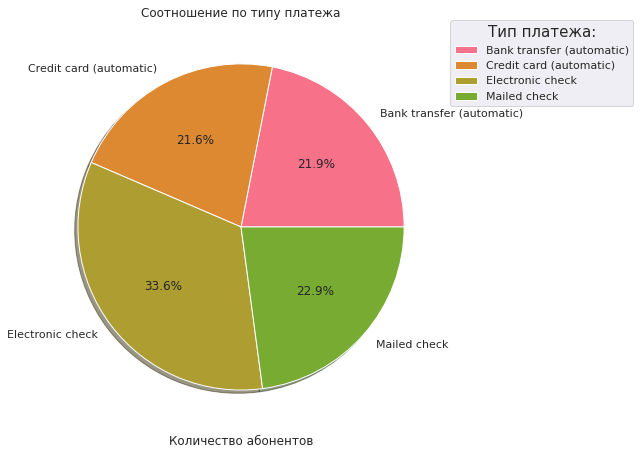

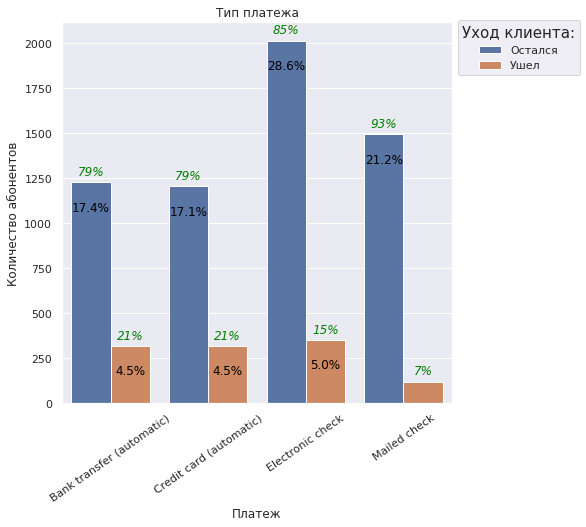

In [37]:
# тип платежа

print(unique_values(['payment_method']))

# Посмотрим на круговую диаграмму
pie_exited('payment_method', 'Соотношение по типу платежа', 'Тип платежа:')

# Посмотрим на столбчатый график в зависимости от целевого признака
countplot_exited('payment_method', 'Тип платежа', 'Платеж', 35)

У 33,6% клиентов (2365 человек) электронный чек, из них:
- 15% ушли от оператора;
- 85% осталось.

У 22,9% (1612 человек) - чек, отправленный по почте, из них:
- 7% ушли от оператора;
- 93% осталось. 

У 21,9% (1544 человек) - банковская оплата, из них:
- 21% ушли от оператора;
- 79% осталось. 

У 21,6% (1522 человек) - оплата с помощью кредитной карты, из них:
- 21% ушли от оператора;
- 79% осталось. 

Весьма равномерная выборка. Меньше всего ушло клиентов с чеком, отправленным по почте.

Значения столбца  gender и кол-во уникальных значений 2

Male      3555
Female    3488
Name: gender, dtype: int64

None


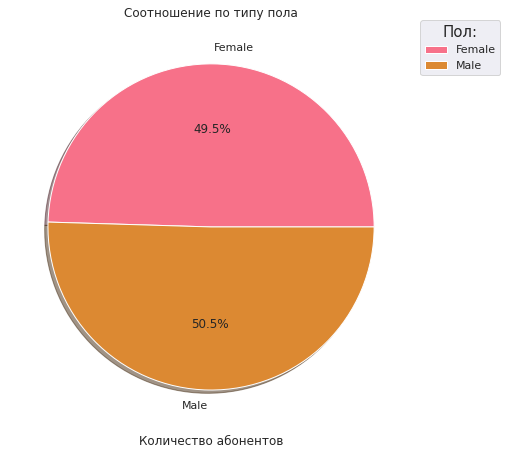

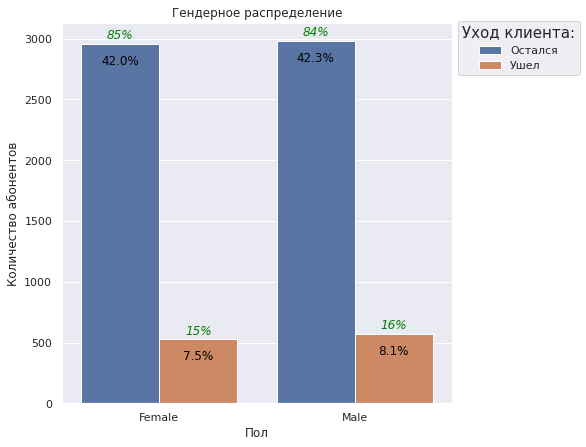

In [38]:
# пол

print(unique_values(['gender']))

# Посмотрим на круговую диаграмму
pie_exited('gender', 'Соотношение по типу пола', 'Пол:')

# Посмотрим на столбчатый график в зависимости от целевого признака
countplot_exited('gender', 'Гендерное распределение', 'Пол', 0)

50,5% клиентов (3555 человек) мужчины, из них:
- 16% ушли ;
- 84% осталось.

49,5% (3488 человек) - женщины, из них:
- 15% ушли от оператора;
- 85% осталось. 

Аналогично, весьма равномерная выборка.

Можем предположить, что гендер никак не влияет на уход клиента.

Значения столбца  senior_citizen и кол-во уникальных значений 2

No     5901
Yes    1142
Name: senior_citizen, dtype: int64

None


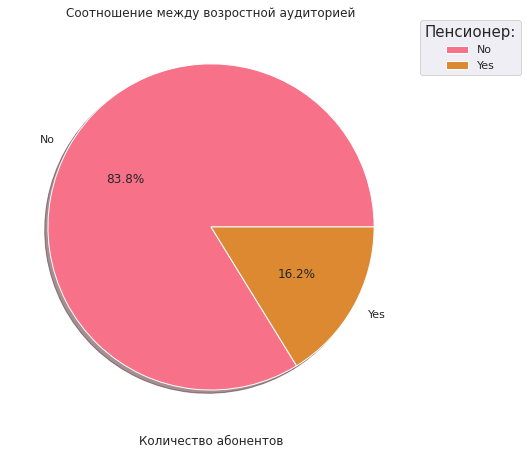

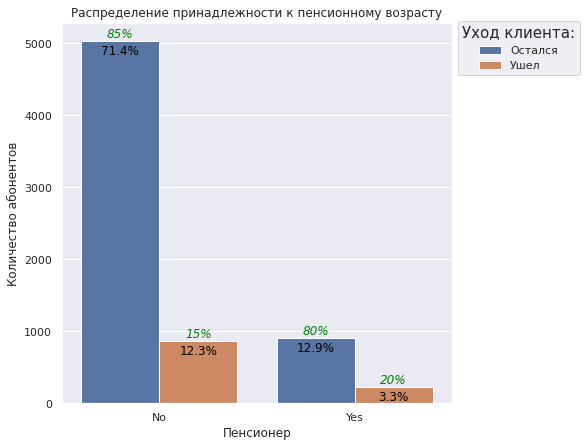

In [39]:
# является ли абонент пенсионером

print(unique_values(['senior_citizen']))

# Посмотрим на круговую диаграмму
pie_exited('senior_citizen', 'Соотношение между возростной аудиторией', 'Пенсионер:')

# Посмотрим на столбчатый график в зависимости от целевого признака
countplot_exited('senior_citizen', 'Распределение принадлежности к пенсионному возрасту', 'Пенсионер', 0)

83,8% клиентов (5901 человек) не являются пенсионерами, из них:
- 15% ушли ;
- 85% осталось.

16,2% (1142 человек) - пенсионеры, из них:
- 20% ушли от оператора;
- 80% осталось. 

Как видим, от оператора ушло 20% пенсионеров, около 230 человек, что является примерно 3,3% от общего кол-ва клиентов. Причину ухода возрастных клиентов трудно раскрыть детальнее, без конкретных возростных данных, но есть вероятность, что она (причина) не связана с пакетами услуг.

Значения столбца  partner и кол-во уникальных значений 2

No     3641
Yes    3402
Name: partner, dtype: int64

None


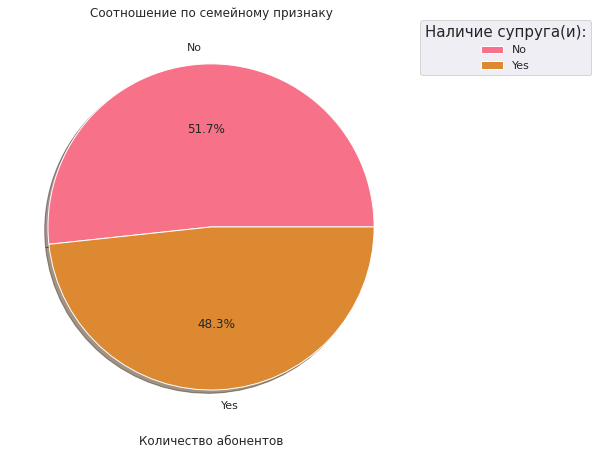

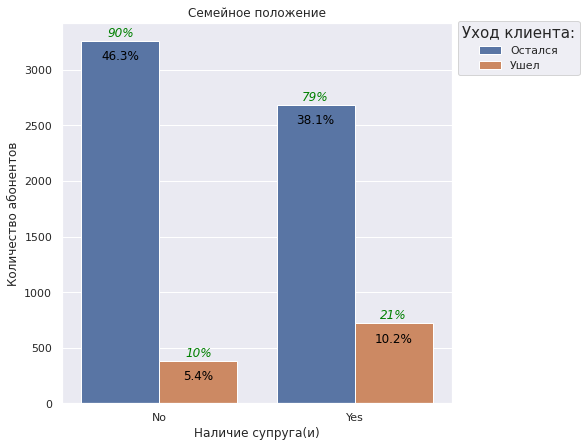

In [40]:
# есть ли у абонента супруг или супруга

print(unique_values(['partner']))

# Посмотрим на круговую диаграмму
pie_exited('partner', 'Соотношение по семейному признаку', 'Наличие супруга(и):')

# Посмотрим на столбчатый график в зависимости от целевого признака
countplot_exited('partner', 'Семейное положение', 'Наличие супруга(и)', 0)

51,7% клиентов (3641 человек) холосты, из них:
- 10% ушли ;
- 90% осталось.

48,3% (3402 человек) - находятся в браке, из них:
- 21% ушли от оператора;
- 79% осталось. 

В компании охотнее остаются холостые люди.

Значения столбца  dependents и кол-во уникальных значений 2

No     4933
Yes    2110
Name: dependents, dtype: int64

None


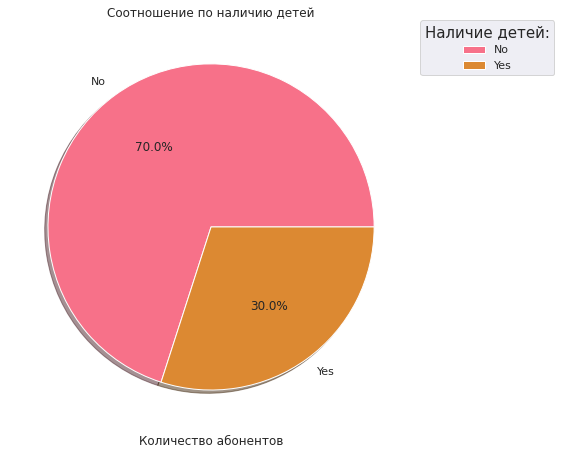

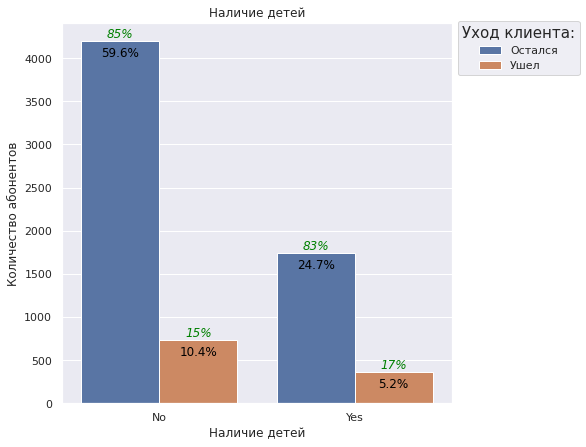

In [41]:
# есть ли у абонента дети

print(unique_values(['dependents']))

# Посмотрим на круговую диаграмму
pie_exited('dependents', 'Соотношение по наличию детей', 'Наличие детей:')

# Посмотрим на столбчатый график в зависимости от целевого признака
countplot_exited('dependents', 'Наличие детей', 'Наличие детей', 0)

У 70% клиентов (4933 человек) дети отсутствуют, из них:
- 15% ушли ;
- 85% осталось.

У 30% (2110 человек) - дети есть, из них:
- 17% ушли от оператора;
- 83% осталось. 

Значения столбца  internet_service и кол-во уникальных значений 3

Fiber optic    3096
DSL            2421
No             1526
Name: internet_service, dtype: int64

None


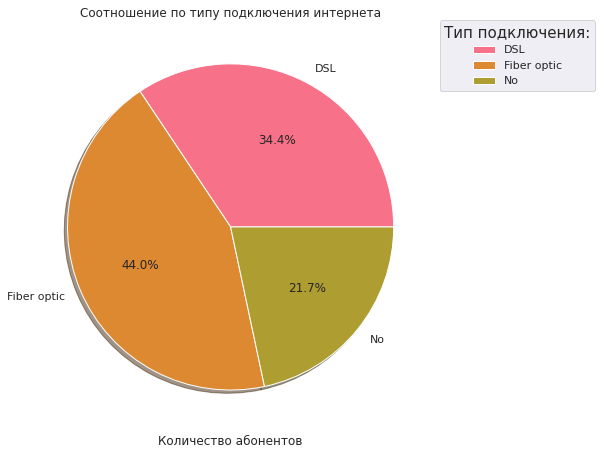

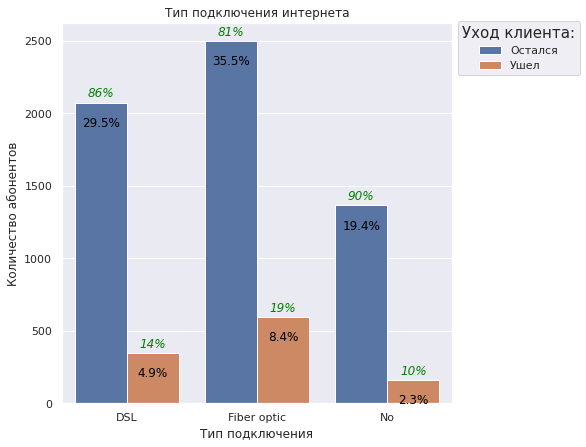

In [42]:
# тип подключения

print(unique_values(['internet_service']))

# Посмотрим на круговую диаграмму
pie_exited('internet_service', 'Соотношение по типу подключения интернета', 'Тип подключения:')

# Посмотрим на столбчатый график в зависимости от целевого признака
countplot_exited('internet_service', 'Тип подключения интернета', 'Тип подключения', 0)

У 44% клиентов (3096 человек) оптоволоконный кабель, из них:
- 19% ушли ;
- 81% осталось.

У 34,4% (2421 человек) - цифровая абонентская линия, из них:
- 14% ушли от оператора;
- 86% осталось. 

У 21,7% (1526 человек) - подключение интернета отсутствует, из них:
- 10% ушли от оператора;
- 90% осталось. 

У DSL и Fiber optic зависимость ухода из компании примерно одинаковая, а вот людей, кто не использует интернет, уходит гораздо меньше.

Значения столбца  online_security и кол-во уникальных значений 2

No     5024
Yes    2019
Name: online_security, dtype: int64

None


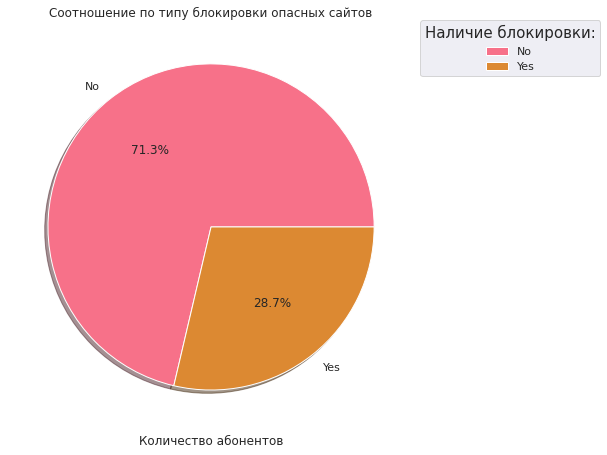

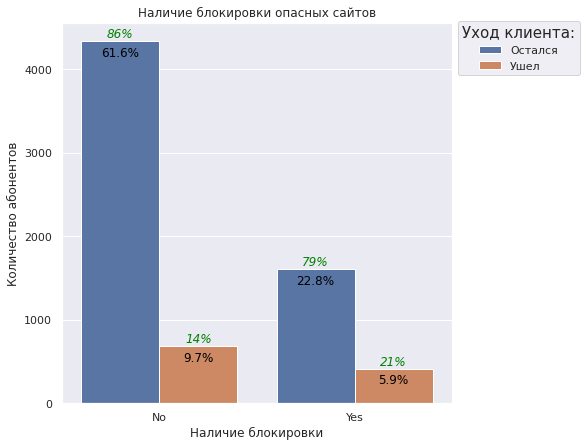

In [43]:
# блокировка опасных сайтов

print(unique_values(['online_security']))

# Посмотрим на круговую диаграмму
pie_exited('online_security', 'Соотношение по типу блокировки опасных сайтов', 'Наличие блокировки:')

# Посмотрим на столбчатый график в зависимости от целевого признака
countplot_exited('online_security', 'Наличие блокировки опасных сайтов', 'Наличие блокировки', 0)

У 71,3% клиентов (5024 человек) блокировка опасных сайтов отсутствует, из них:
- 14% ушли ;
- 86% осталось.

У 28,7% (2019 человек) - блокировка есть, из них:
- 21% ушли от оператора;
- 79% осталось. 

Можно заметить, что наличие доп. опций не влияет на принятие решение о уходе.

Значения столбца  online_backup и кол-во уникальных значений 2

No     4614
Yes    2429
Name: online_backup, dtype: int64

None


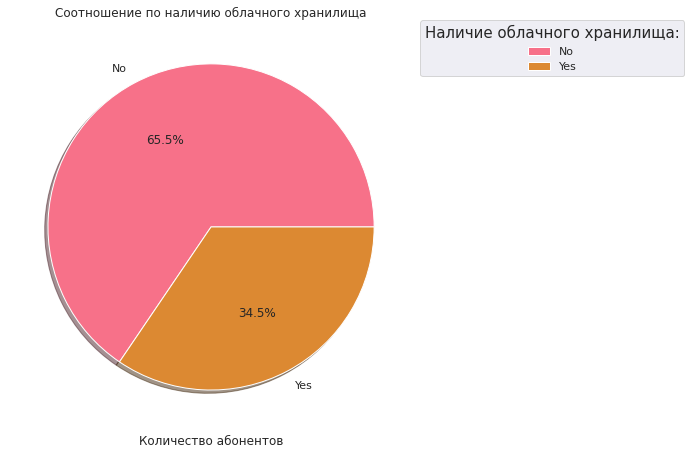

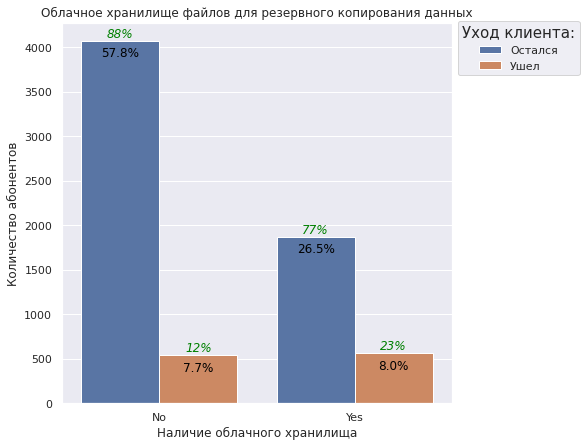

In [44]:
# облачное хранилище файлов для резервного копирования данных

print(unique_values(['online_backup']))

# Посмотрим на круговую диаграмму
pie_exited('online_backup', 'Соотношение по наличию облачного хранилища', 'Наличие облачного хранилища:')

# Посмотрим на столбчатый график в зависимости от целевого признака
countplot_exited('online_backup', 'Облачное хранилище файлов для резервного копирования данных', 'Наличие облачного хранилища', 0)

У 65,5% клиентов (4614 человек) облочное хранилище отсутствует, из них:
- 12% ушли ;
- 88% осталось.

У 34,5% (2429 человек) - хранилище есть, из них:
- 23% ушли от оператора;
- 77% осталось. 

Более выраженный уход клиентов с подключенным пакетом услуг, чем без него. Клиентов не удовлетворяет соотношения цены\качества оказания услуг?

Значения столбца  device_protection и кол-во уникальных значений 2

No     4621
Yes    2422
Name: device_protection, dtype: int64

None


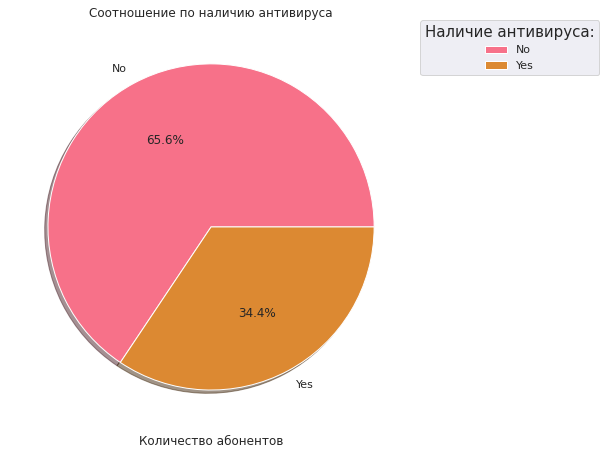

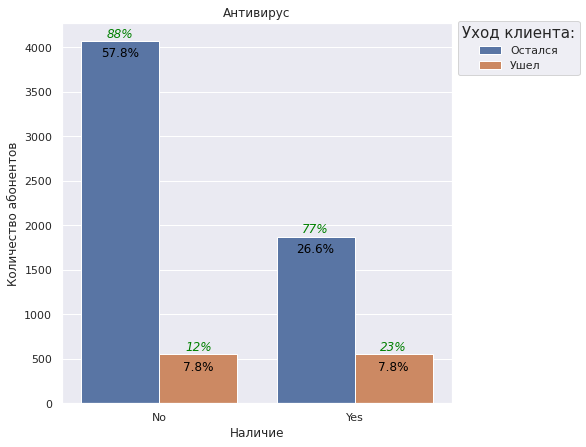

In [45]:
# антивирус

print(unique_values(['device_protection']))

# Посмотрим на круговую диаграмму
pie_exited('device_protection', 'Соотношение по наличию антивируса', 'Наличие антивируса:')

# Посмотрим на столбчатый график в зависимости от целевого признака
countplot_exited('device_protection', 'Антивирус', 'Наличие', 0)

У 65,6% клиентов (4621 человек) антивирус отсутствует, из них:
- 12% ушли ;
- 88% осталось.

У 34,4% (2422 человек) - хранилище есть, из них:
- 23% ушли от оператора;
- 77% осталось. 

Более выраженный уход клиентов с подключенным пакетом услуг, чем без него. Клиентов не удовлетворяет соотношения цены\качества оказания услуг?

Значения столбца  tech_support и кол-во уникальных значений 2

No     4999
Yes    2044
Name: tech_support, dtype: int64

None


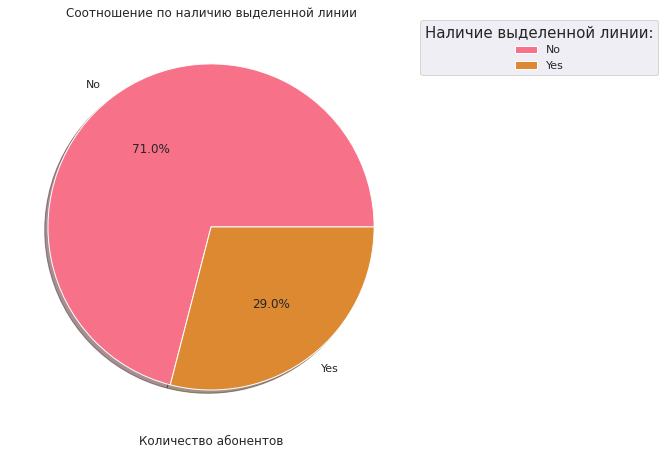

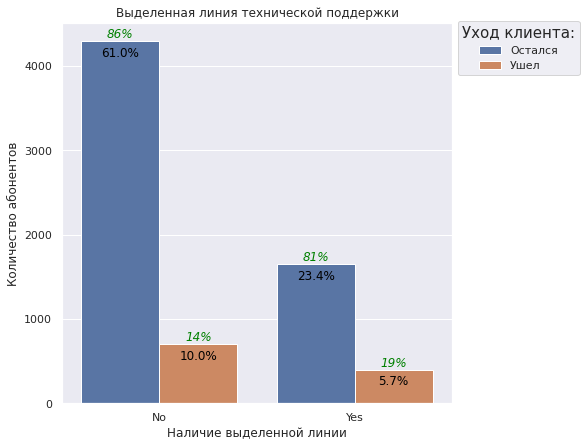

In [46]:
# выделенная линия технической поддержки

print(unique_values(['tech_support']))

# Посмотрим на круговую диаграмму
pie_exited('tech_support', 'Соотношение по наличию выделенной линии', 'Наличие выделенной линии:')

# Посмотрим на столбчатый график в зависимости от целевого признака
countplot_exited('tech_support', 'Выделенная линия технической поддержки', 'Наличие выделенной линии', 0)

У 71% клиентов (4999 человек) не подключена выделенная линия, из них:
- 14% ушли ;
- 86% осталось.

У 29% (2044 человек) - выделенная линия есть, из них:
- 19% ушли от оператора;
- 81% осталось. 

Тут картина больше сглаживается, видимо выделенная линия помогает бесконфликтнее улаживать возникшую проблему.

Значения столбца  streaming_tv и кол-во уникальных значений 2

No     4336
Yes    2707
Name: streaming_tv, dtype: int64

None


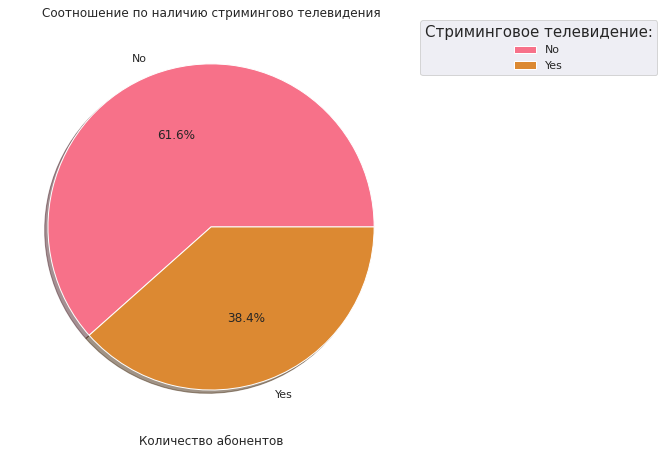

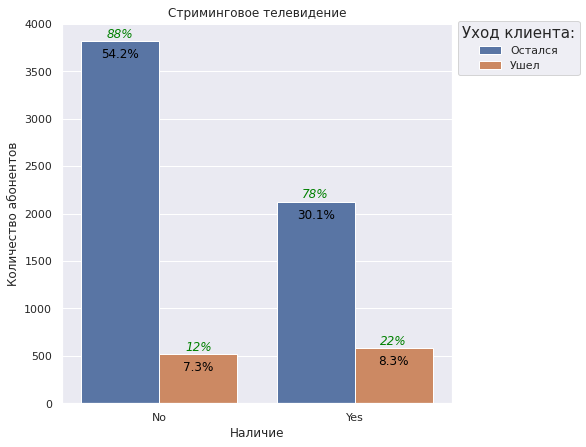

In [47]:
# стриминговое телевидение

print(unique_values(['streaming_tv']))

# Посмотрим на круговую диаграмму
pie_exited('streaming_tv', 'Соотношение по наличию стримингово телевидения', 'Стриминговое телевидение:')

# Посмотрим на столбчатый график в зависимости от целевого признака
countplot_exited('streaming_tv', 'Стриминговое телевидение', 'Наличие', 0)

У 61,6% клиентов (4336 человек) стриминговое телевидение не подключено, из них:
- 12% ушли ;
- 88% осталось.

У 38,4% (2707 человек) - тв есть, из них:
- 22% ушли от оператора;
- 78% осталось. 

Похожая ситуация как и с антивирусом: более выраженный уход клиентов с подключенным пакетом услуг, чем без него.

Значения столбца  streaming_movies и кол-во уникальных значений 2

No     4311
Yes    2732
Name: streaming_movies, dtype: int64

None


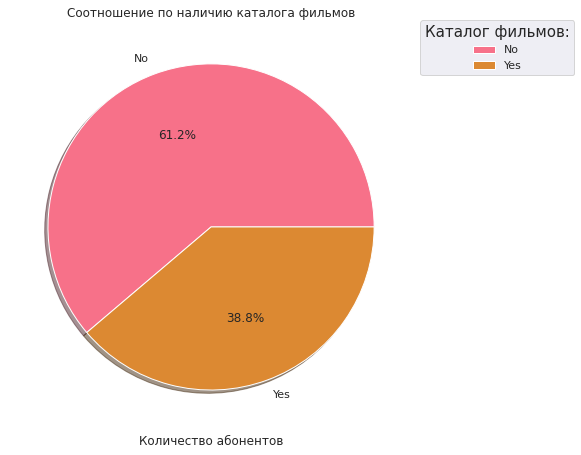

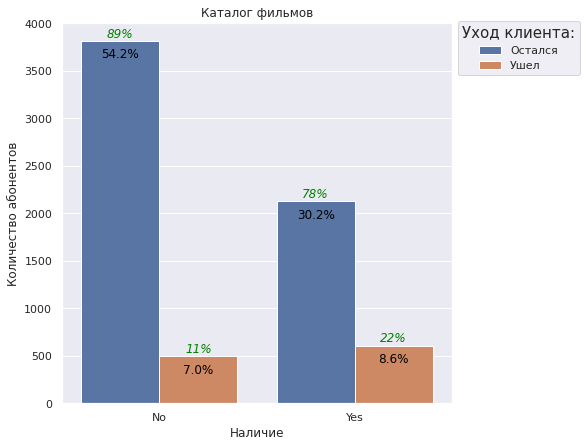

In [48]:
# каталог фильмов

print(unique_values(['streaming_movies']))

# Посмотрим на круговую диаграмму
pie_exited('streaming_movies', 'Соотношение по наличию каталога фильмов', 'Каталог фильмов:')

# Посмотрим на столбчатый график в зависимости от целевого признака
countplot_exited('streaming_movies', 'Каталог фильмов', 'Наличие', 0)

У 61,2% клиентов (4311 человек) каталог фильмов не подключен, из них:
- 11% ушли ;
- 89% осталось.

У 38,8% (2732 человек) - каталог подключен, из них:
- 22% ушли от оператора;
- 78% осталось. 

Похожая ситуация как и с другими пакетами интернет услуг.

Значения столбца  multiple_lines и кол-во уникальных значений 2

No     4072
Yes    2971
Name: multiple_lines, dtype: int64

None


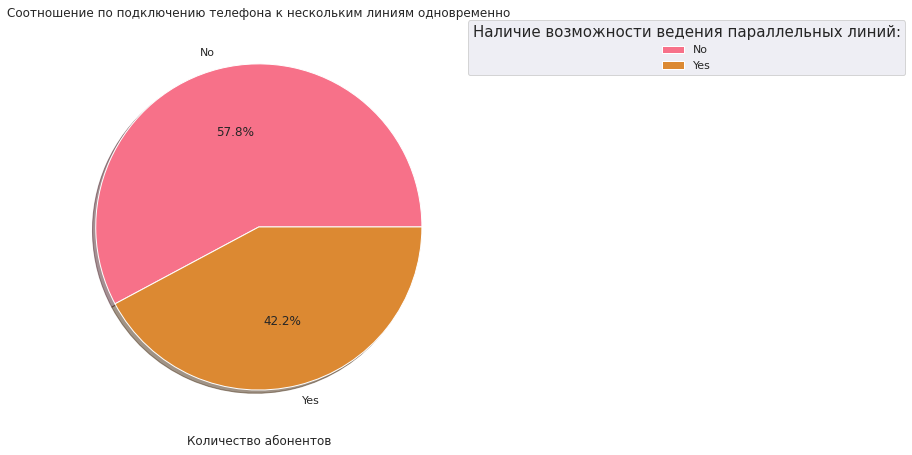

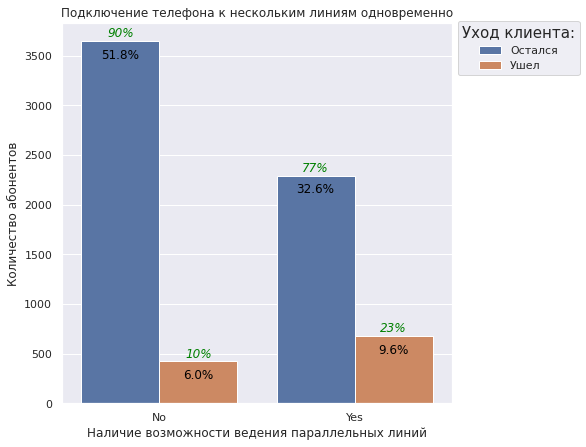

In [49]:
# подключение телефона к нескольким линиям одновременно.

print(unique_values(['multiple_lines']))

# Посмотрим на круговую диаграмму
pie_exited('multiple_lines', 'Соотношение по подключению телефона к нескольким линиям одновременно', 'Наличие возможности ведения параллельных линий:')

# Посмотрим на столбчатый график в зависимости от целевого признака
countplot_exited('multiple_lines', 'Подключение телефона к нескольким линиям одновременно', 'Наличие возможности ведения параллельных линий', 0)

У 57,8% клиентов (4072 человек) наличие ведения параллельных линий не подключено, из них:
- 10% ушли ;
- 90% осталось.

У 42,2% (2971 человек) - подключено, из них:
- 23% ушли от оператора;
- 77% осталось. 

Количественное и процентное соотношения ушедших выше у тех, кто услугу подключал.

***Подытог по визуальному анализу категориальных признаков:***

 - Выборка местами неравномерна
 - **84,4%** клиентов или **5942** человек **<u>осталось</u>** у оператора, **15,6%** или **1101** человек **<u>ушло</u>**
 - Самый популярный способ оплаты - помесячный, так же процент ухода таких клиентов намного ниже
 - Почти 60% клиентов имеют электронный расчётный лист
 - Клиенты предпочитают электронный чек, процентное соотношение ухода таких клиентов, а так же тех, кто получает чек по почте, ниже.
 - Банковская оплата и оплата с помощью кредитной карты - сопоставимы
 - Равномерное гендерное распределение и маленький процент пожилой аудитории, но процент ухода возрастных клиентов выше
 - Равномерное распределение между клиентами в браке и холостыми, но процент ухода замужних\женатых выше
 - У 30% клиентов есть дети, и их наличие не влияет на уход из компании
 - Популярностью пользуется Fiber optic, но процент ухода ниже у тех, кто вообще не использует интернет
 - Дополнительные опции не пользуются "бешенной" популярностью, доля подключения не превышает 30-35% (в редких случаях 38-42%), при этом в целом количественное и процентное соотношение ушедших выше. Возникает вопрос о недовольстве клиентами качеством и\или ценой оказанных услуг.

**Построим графики для количественных признаков.**

In [50]:
# сделаем функцию для отображения boxplota и гистограммы, то есть violinplot

def viol_numeric(column, title, xlabel, arange, rotation):
    sns.set(rc={'figure.figsize':(14,6)})
    sns.violinplot(data=data, x=column, inner_kws=dict(box_width=15, whis_width=2, color=".6"), color='violet')
    plt.title(title)
    plt.xticks(ticks=arange, rotation=rotation)
    plt.xlabel(xlabel)
    plt.show()
    
# и функцию распределения взависимости от целевого признака

def kde_numeric(column, title, xlabel, arange, rotation):
    fig, ax = plt.subplots(figsize=(14, 6))
    sns.kdeplot(data=data[data['exited']==True], x=column, fill=True, label=1, alpha=0.5, color='blue', ax=ax)
    sns.kdeplot(data=data[data['exited']==False], x=column, fill=True, label=0,  alpha=0.5, color='orange', ax=ax)
    plt.title(title)
    plt.xticks(ticks=arange, rotation=rotation)
    plt.xlabel(xlabel)
    legend = plt.legend(['Ушел', 'Остался'], title = "Уход клиента:",
                     title_fontsize = 15, bbox_to_anchor=(1, 1.02), loc='upper left')
    plt.show()

Значения столбца  monthly_charges и кол-во уникальных значений 1585

20.05     61
19.85     45
19.90     44
19.95     44
19.65     43
          ..
87.65      1
35.30      1
114.85     1
56.50      1
97.25      1
Name: monthly_charges, Length: 1585, dtype: int64

None
count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthly_charges, dtype: float64


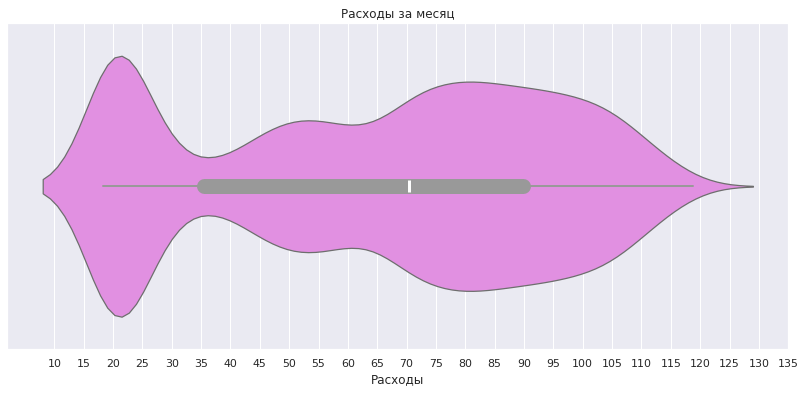

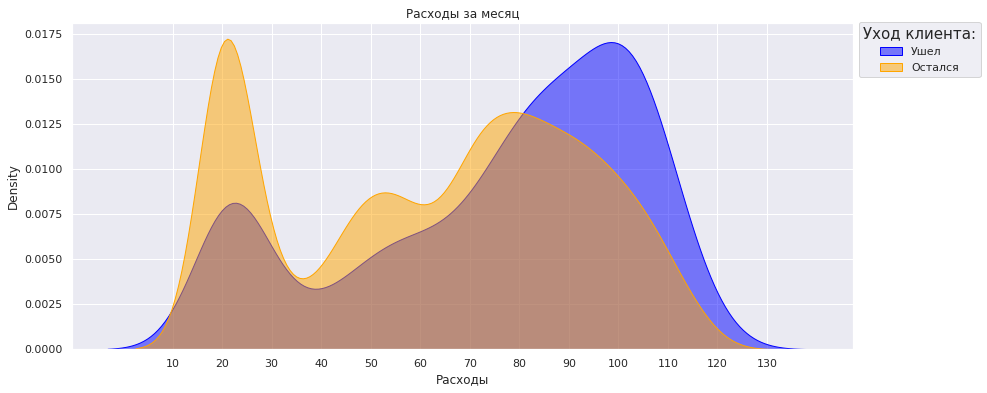

In [51]:
# расходы за месяц


print(unique_values(['monthly_charges']))

#  Посмотрим на статистические данные
print(data['monthly_charges'].describe())

# графики
viol_numeric('monthly_charges', 'Расходы за месяц', 'Расходы', np.arange(10,140,5), 0)
kde_numeric('monthly_charges', 'Расходы за месяц', 'Расходы', np.arange(10,140,10), 0) 

Первая и третья квартили охватывают значения от 35,5 до 89,5. При этом большая расходов в диапазоне от минимального значения в 18,25 и до 25. Второй большой диапазон от 65 до 105. Среднее значение не совпадает с медианой, 64,7 против 70,35. Видим просадку расходов в районе 35-40. Выбросы отсутствуют.

Плотность трат клиентов значительно больше на минимальных значениях, у тех, кто ушел, стримится к максимальным. Можем сделать вывод, что ушли больше те, у кого среднемесячный расход был от 90 до 118,75.

Значения столбца  total_charges и кол-во уникальных значений 6658

0.00       11
20.45       6
101.00      5
255.00      4
40.10       4
           ..
1213.10     1
2035.20     1
480.41      1
5776.00     1
96.94       1
Name: total_charges, Length: 6658, dtype: int64

None
count    7043.000000
mean     2115.312885
std      2112.742814
min         0.000000
25%       436.750000
50%      1343.350000
75%      3236.690000
max      9221.380000
Name: total_charges, dtype: float64


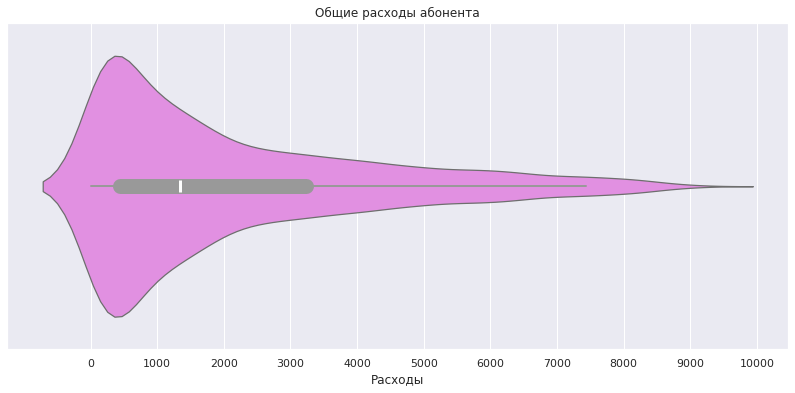

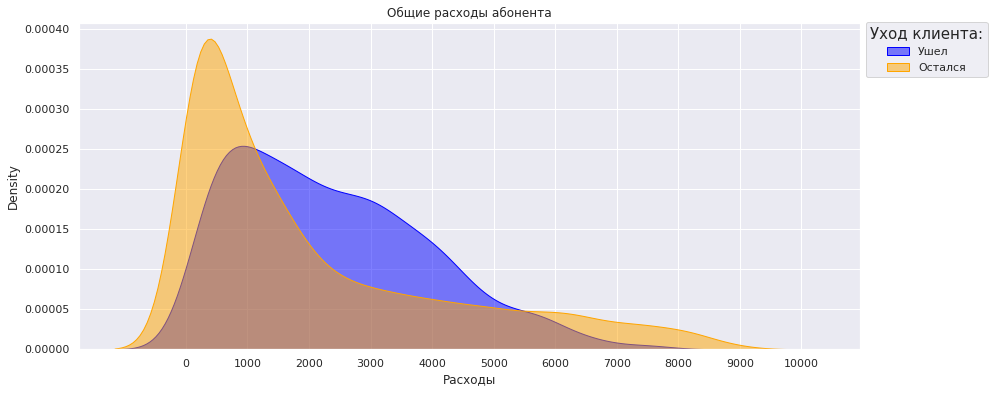

In [52]:
# общие расходы абонента


print(unique_values(['total_charges']))

#  Посмотрим на статистические данные
print(data['total_charges'].describe())

# графики
viol_numeric('total_charges', 'Общие расходы абонента', 'Расходы', np.arange(0,11000,1000), 0)
kde_numeric('total_charges', 'Общие расходы абонента', 'Расходы', np.arange(0,11000,1000), 0) 

Тут мы наблюдаем основной диапазон основных расходов не превышает 2200, в данном интервале и находятся среднее = 2115 и медиана = 1343. 3 квартиль заканчивается на значение 3236, но при этом правый хвост уходит до ~7200. Выбросы отсутствуют. Но взглянем распределение чуть подробнее.

В отношение распределения общих расходов между ушедшими и оставшимися наблюдаем следующую картину: пик максимальной плотности у оставшихся меньше 500, при этом основной диапазон не превышает 2000, далее идет равномерное, чуть нисходящее, распределение вплоть до 8000. У ушедших же основной диапазон плотности от 7000 до 4000. Далее идет значительное стремление к 0. Такие расходы из-за дополнительных пакетов опций, которые не удовлетворяли клиента?

Так же можем предположить, что основную выручку компании делает количество клиентов, а не "максимальность" общего чека абонента. 

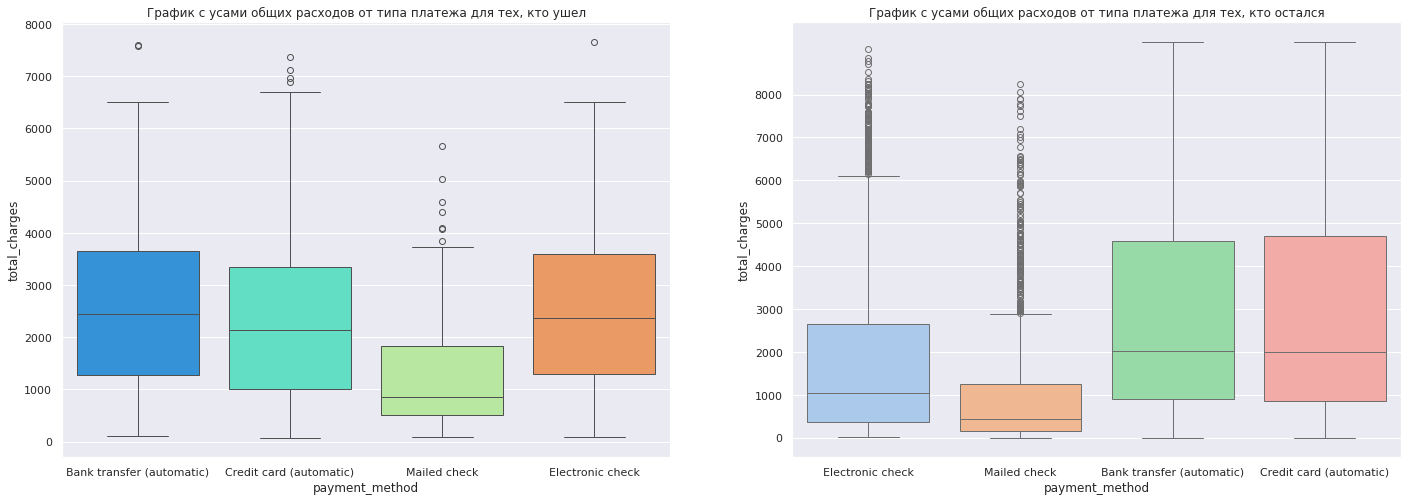

In [53]:
# посмотрим на зависимость общих расходов от типа платежа
fig, ax = plt.subplots(1,2, figsize=(24,8))
ax[0].set_title('График с усами общих расходов от типа платежа для тех, кто ушел')
sns.boxplot(x='payment_method', y='total_charges', data=data[data['exited']==True], palette='rainbow', ax=ax[0])
ax[1].set_title('График с усами общих расходов от типа платежа для тех, кто остался')
sns.boxplot(x='payment_method', y='total_charges', data=data[data['exited']==False], palette='pastel', ax=ax[1])
plt.yticks(ticks=np.arange(0,9000,1000))
plt.show()

Наблюдаем следующую картину:
- общие траты для тех кто остался похожи между банковской оплатой и кредитной картой
- малое количество трат для оставшихся, кто пользуется почтой. В данном случае большая сумма расходов выглядит выбивающимся значением
- Ушедшие предпочитали использовать электронный чек и банковскую оплату
- У оставшихся суммы расходов при использование электронного меньше. Есть ли какие-то проблемы с доставкой электронного чека?

Значения столбца  total_days и кол-во уникальных значений 251

2191    265
153     249
92      243
31      236
123     236
       ... 
121       1
2253      1
424       1
1309      1
547       1
Name: total_days, Length: 251, dtype: int64

None
count    7043.000000
mean      898.555729
std       683.130510
min         0.000000
25%       276.000000
50%       761.000000
75%      1461.000000
max      2314.000000
Name: total_days, dtype: float64


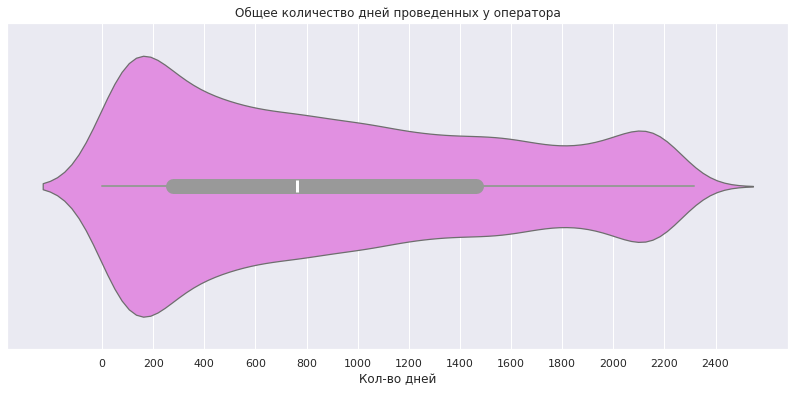

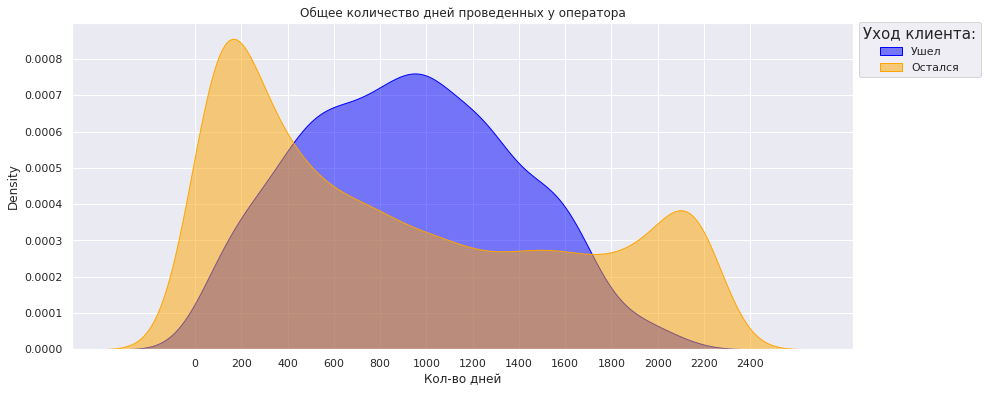

In [54]:
# общее количество дней проведенных у оператора


print(unique_values(['total_days']))

#  Посмотрим на статистические данные
print(data['total_days'].describe())

# графики
viol_numeric('total_days', 'Общее количество дней проведенных у оператора', 'Кол-во дней', np.arange(0,2600,200), 0)
kde_numeric('total_days', 'Общее количество дней проведенных у оператора', 'Кол-во дней', np.arange(0,2600,200), 0) 

Можно выделить 2 категории клиентов: те, кто провел меньше 400 дней, и те, кто является клиентом больше 2000 дней. От значения 400 до 2000 идет постепенный отток клиентов.

Относительно оставшихся: дублируется общая картина - постоянные клиенты, кто более 1800 дней у оператора, и новички, которые где-то полгода (можно предположить, что оплата у таких или раз в год-два, или не подключены доп. опции)

Ушедшие: график выглядит нормальным, максимальная плотность в диапазоне 0 до 1800 дней. Можно сказать, что клиенты равномерно уходят в течение всего срока, пик плотности сфокусирован на отметке 1000.

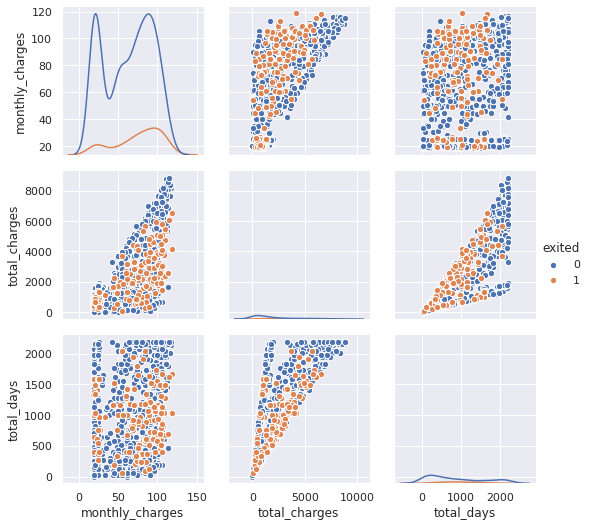

In [55]:
# посмотрим на взаимосвязи между количественными признаки по отношению к целевому
numeric_data = data.select_dtypes(include=['float64', 'int64'])
g = sns.PairGrid(numeric_data.sample(n=1000), hue="exited")
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=40)
g = g.map_diag(sns.kdeplot)
g = g.add_legend()

Для ушедших клиентов характеры средние идентичные расходы за более короткий срок.

***Итак, в исследовательском анализе нем осталось посмотреть корреляцию признаков. Воспользуемся методом библиотеки `phik`. Суть метода базируется на подсчете хи-квадрат статистики, затем ее трансформации в нечто подобное коэффициенту корреляции только на отрезке от 0 (нулевая взаимосвязь) до 1 (максимальная взаимосвязь). С этой целью разработчики считают аналогичную хи-квадрат статистику для различных значений корреляции p случайных величин из двумерного нормального распределения.***

***Так же уменьшим наш датафрейм - удалим столбцы дата начала и окончания действия договора, т.к у нас не временной ряд и в дальнейшем при обучение модели может произойти утечка данных или переобучение модели.***

In [56]:
# Удалим столбцы begin_date и end_date
data = data.drop(['begin_date', 'end_date'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7043 non-null   object 
 1   paperless_billing  7043 non-null   object 
 2   payment_method     7043 non-null   object 
 3   monthly_charges    7043 non-null   float64
 4   total_charges      7043 non-null   float64
 5   gender             7043 non-null   object 
 6   senior_citizen     7043 non-null   object 
 7   partner            7043 non-null   object 
 8   dependents         7043 non-null   object 
 9   internet_service   7043 non-null   object 
 10  online_security    7043 non-null   object 
 11  online_backup      7043 non-null   object 
 12  device_protection  7043 non-null   object 
 13  tech_support       7043 non-null   object 
 14  streaming_tv       7043 non-null   object 
 15  streaming_movies   7043 non-null   object 
 16  multiple_lines

,type,paperless_billing,payment_method,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
type,1.000000,0.108187,0.275639,0.000000,0.080433,0.180417,0.148631,0.499595,0.149917,0.100320,0.143302,0.176622,0.070355,0.074556,0.072905
paperless_billing,0.108187,1.000000,0.370741,0.009251,0.238049,0.024052,0.175547,0.232406,0.000000,0.186263,0.147529,0.052182,0.327366,0.307363,0.250879
payment_method,0.275639,0.370741,1.000000,0.000000,0.295357,0.231568,0.218618,0.326352,0.252544,0.276340,0.298186,0.281813,0.368070,0.368123,0.322401
gender,0.000000,0.009251,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028065,0.000000,0.000000,0.008264,0.028052,0.000000
senior_citizen,0.080433,0.238049,0.295357,0.000000,1.000000,0.013593,0.313729,0.162217,0.063145,0.086486,0.075958,0.098778,0.159447,0.181494,0.222399
partner,0.180417,0.024052,0.231568,0.000000,0.013593,1.000000,0.670497,0.000000,0.225985,0.217648,0.227230,0.205599,0.189444,0.169244,0.210397
dependents,0.148631,0.175547,0.218618,0.000000,0.313729,0.670497,1.000000,0.108033,0.138391,0.054541,0.027983,0.121225,0.010443,0.044985,0.033304
internet_service,0.499595,0.232406,0.326352,0.000000,0.162217,0.000000,0.108033,1.000000,0.240884,0.226400,0.226405,0.239297,0.266345,0.264952,0.215595
online_security,0.149917,0.000000,0.252544,0.000000,0.063145,0.225985,0.138391,0.240884,1.000000,0.434688,0.423139,0.524490,0.287728,0.304518,0.150393
online_backup,0.100320,0.186263,0.276340,0.028065,0.086486,0.217648,0.054541,0.226400,0.434688,1.000000,0.446160,0.456290,0.425957,0.405344,0.304657


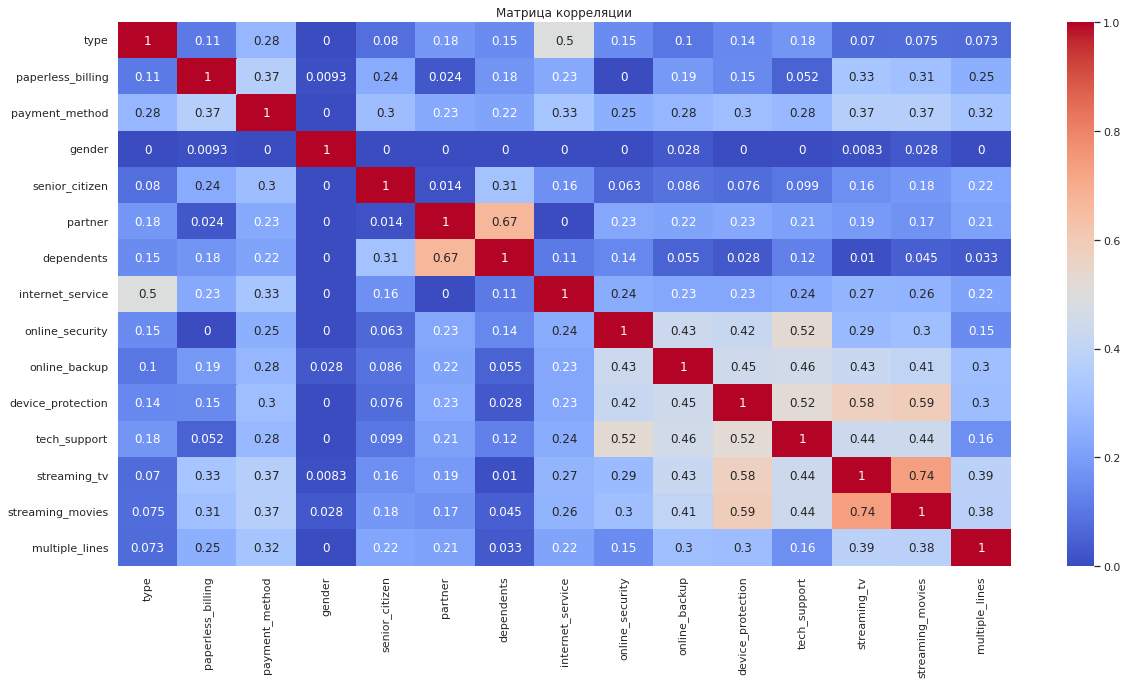

In [57]:
# Воспользуемся методом корреляции и хитмепом для наблюдения зависимостей категориальных признаков для оставшихся клиентов

phik_matrix = data.loc[(data['exited'] == 0), category_features].phik_matrix()
display(phik_matrix)

# Визуализируем
plt.figure(figsize = (20, 10))
sns.heatmap(phik_matrix, vmin=0, vmax=1, cmap='coolwarm', annot=True)
plt.title('Матрица корреляции')
plt.show()

,monthly_charges,total_charges,total_days
monthly_charges,1.000000,0.636442,0.244634
total_charges,0.636442,1.000000,0.828836
total_days,0.244634,0.828836,1.000000


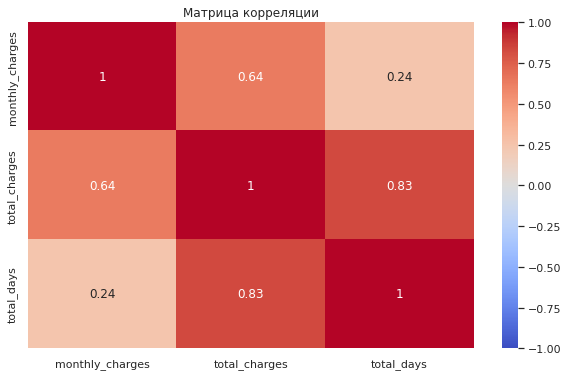

In [58]:
# Воспользуемся методом корреляции и хитмепом для наблюдения зависимостей количественных признаков для оставшихся клиентов
# используем корреляция Пирсона, с помощью нее хорошо наблюдается линейность в диапазоне от -1 до 1

corr_columns = ['monthly_charges', 'total_charges', 'total_days']
corr_matrix = data.loc[(data['exited'] == 0), corr_columns].corr()
display(corr_matrix)

# Визуализируем
plt.figure(figsize = (10, 6))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.title('Матрица корреляции')
plt.show()

Для оставшихся абонентов хорошо прослеживается положительная линейная корреляция между кол-вом дней и общими расходами клиентов (даже можно выделить проблему мультиколлинеарности у данных признаков), чем дольше клиент находится в компании, тем большей он потратил. А так же зависимость между общими и среднемесячными тратами.

Относительно категориальных признаков прослеживаются связи между:
- типом оплаты и типом подключения
- нахождением в браке и наличием детей
- выделенной линией технической поддержки и блокировкой опасных сайтов или наличием антивируса
- наличием антивируса и подключением стримингового телевидения и каталогом фильмов
- а так же тем, что клиенты подключившие стриминговое телевидение скорее всего подключат и каталогом фильмов, и наоборот (можно выделить мультиколлериальность у данных признаков)

,type,paperless_billing,payment_method,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
type,1.000000,0.140886,0.274423,0.000000,0.150255,0.109104,0.133679,0.661150,0.126686,0.000000,0.038293,0.172020,0.030698,0.043208,0.058865
paperless_billing,0.140886,1.000000,0.347812,0.000000,0.232915,0.035067,0.167624,0.212205,0.019486,0.177725,0.156464,0.000000,0.378826,0.366435,0.187496
payment_method,0.274423,0.347812,1.000000,0.000000,0.255006,0.134988,0.253760,0.289629,0.237480,0.134822,0.243754,0.162900,0.359874,0.336080,0.304330
gender,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.063782,0.000000,0.000000,0.000000,0.000000,0.033645,0.000000
senior_citizen,0.150255,0.232915,0.255006,0.000000,1.000000,0.000000,0.387737,0.141255,0.053997,0.089653,0.074380,0.084970,0.112532,0.138066,0.140251
partner,0.109104,0.035067,0.134988,0.000000,0.000000,1.000000,0.546074,0.044135,0.083209,0.000000,0.112091,0.000000,0.000000,0.034856,0.005656
dependents,0.133679,0.167624,0.253760,0.000000,0.387737,0.546074,1.000000,0.130016,0.000000,0.095778,0.065277,0.000000,0.060650,0.163182,0.073877
internet_service,0.661150,0.212205,0.289629,0.000000,0.141255,0.044135,0.130016,1.000000,0.245032,0.258277,0.255048,0.240956,0.286004,0.293306,0.243793
online_security,0.126686,0.019486,0.237480,0.063782,0.053997,0.083209,0.000000,0.245032,1.000000,0.334339,0.321753,0.514455,0.103872,0.115221,0.000000
online_backup,0.000000,0.177725,0.134822,0.000000,0.089653,0.000000,0.095778,0.258277,0.334339,1.000000,0.390561,0.335193,0.314106,0.336002,0.148538


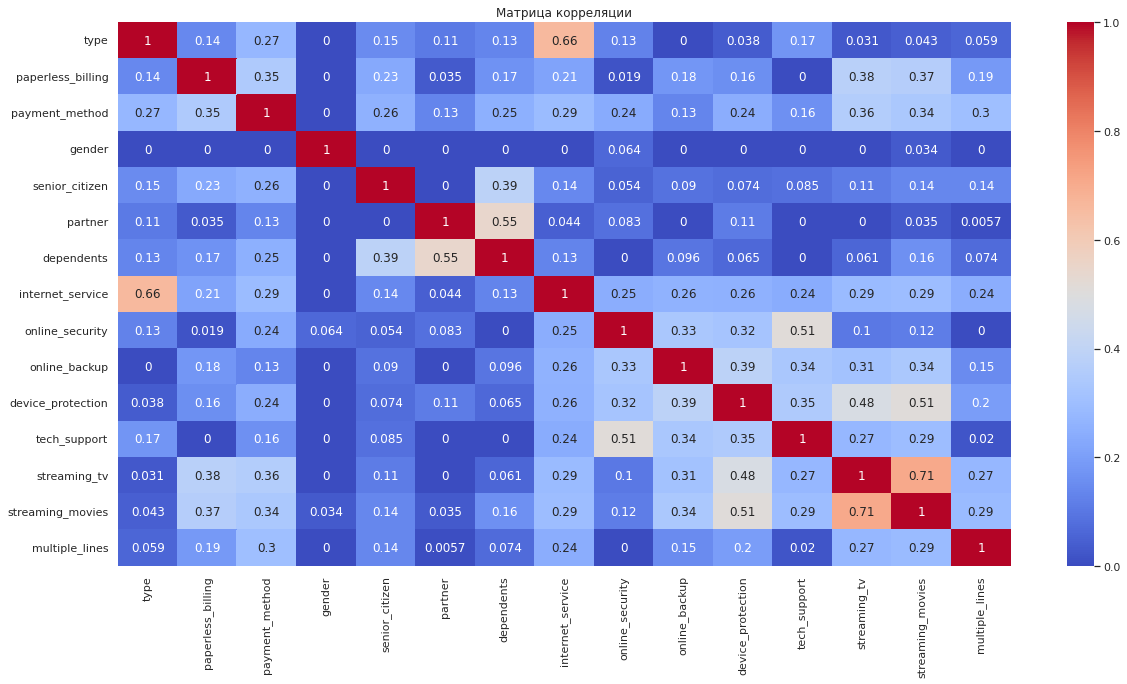

In [59]:
# Воспользуемся методом корреляции и хитмепом для наблюдения зависимостей категориальных признаков для ушедших клиентов

phik_matrix = data.loc[(data['exited'] == 1), category_features].phik_matrix()
display(phik_matrix)

# Визуализируем
plt.figure(figsize = (20, 10))
sns.heatmap(phik_matrix, vmin=0, vmax=1, cmap='coolwarm', annot=True)
plt.title('Матрица корреляции')
plt.show()

,monthly_charges,total_charges,total_days
monthly_charges,1.000000,0.613058,0.026181
total_charges,0.613058,1.000000,0.748822
total_days,0.026181,0.748822,1.000000


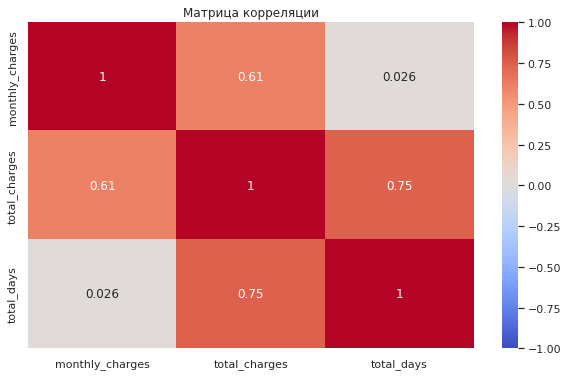

In [60]:
# Воспользуемся методом корреляции и хитмепом для наблюдения зависимостей количественных признаков для ушедших клиентов
# используем корреляция Пирсона, с помощью нее хорошо наблюдается линейность в диапазоне от -1 до 1

corr_columns = ['monthly_charges', 'total_charges', 'total_days']
corr_matrix = data.loc[(data['exited'] == 1), corr_columns].corr()
display(corr_matrix)

# Визуализируем
plt.figure(figsize = (10, 6))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.title('Матрица корреляции')
plt.show()

Весьма похожая ситуация зависимости признаков между собой, как у оставшихся клиентов, только значения корреляции чуть ниже.

Удалим мультиколлеарные признаки

In [61]:
data = data.drop(['total_charges', 'streaming_tv'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7043 non-null   object 
 1   paperless_billing  7043 non-null   object 
 2   payment_method     7043 non-null   object 
 3   monthly_charges    7043 non-null   float64
 4   gender             7043 non-null   object 
 5   senior_citizen     7043 non-null   object 
 6   partner            7043 non-null   object 
 7   dependents         7043 non-null   object 
 8   internet_service   7043 non-null   object 
 9   online_security    7043 non-null   object 
 10  online_backup      7043 non-null   object 
 11  device_protection  7043 non-null   object 
 12  tech_support       7043 non-null   object 
 13  streaming_movies   7043 non-null   object 
 14  multiple_lines     7043 non-null   object 
 15  exited             7043 non-null   int64  
 16  total_days    

**Подытог блока:**

В данном блоке мы провели объединение данных, первоначальную обработку данных и сгенерировали новые признаки, при этом удалив неактуальные\мешающие обучению модели. Провели визуальный исследовательский анализ. Посмотрели распределения признаков и их взаимосвязи с целевыми значениями. Кроме визуального взгляда взаимосвязей использовали корреляцию Phik и Пирсона. Более подробны шаги описаны в самом блоке.

## Подготовка данных

В данном блоке мы проведем следующие операции:
- разделим датафрейм на обучающую и тестовую выборки;
- проведем кодирование данных:
  - выберем энкодинг для категориальных признаков,
  - так же подберем энкодинг для числовых значений,
- определимся с масштабированием выборки;
- сформулируем метрику качества для обучающих моделей.

Одной из моделей обучения будет CatBoost (Остальные модели рассмотрим далее). CatBoost позволяет использовать категориальные признаки без необходимости их предварительно обрабатывать. По слухам говорится, что из "коробки" реультаты кодирования лучше (но мы подберем лучшие гиперпараметры).

In [62]:
# поэтому создадим для такой модели копию
cat_data = deepcopy(data)

Для остальных моделей преобразуем категориальные признаки в численные. Тут выбор останавливался на 2 моделях:
- техники прямого кодирования или отображения (англ. **One-Hot Encoding, OHE**), техника удобна при низкой вариативности признака, что бы не создавать много лишних столбцов, а так же хорошо дружит с линейными моделями;
- или методом максимального правдоподобия (**M-estimate**). В данном случае не создаются новые столбцы.

Так как у нас нет большой вариативности признаков, то M-estimate можно и не использовать. Так же не будем расматривать Ordinal Encoding, так как оно позволяет закодировать категории цифрами, с помощью номера категории, и подходит для преобразования признаков в решающем дереве, случайном лесе, когда все признаки категориальные, и их нужно преобразовать в числа. Поэтому не совсем дружит с линейными моделями.


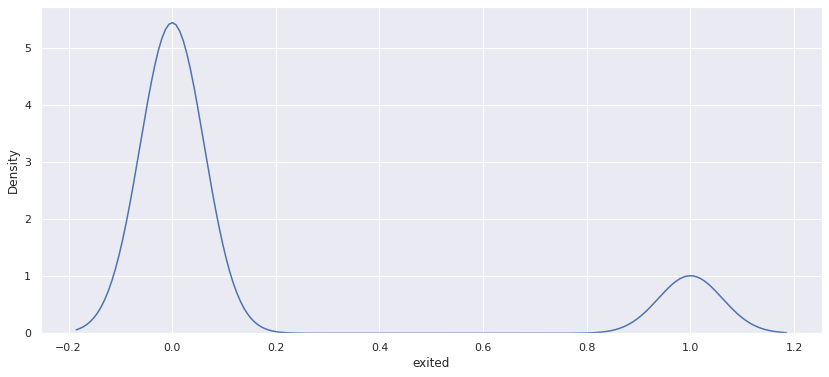

In [63]:
# Объявим переменные признака и цели
features = data.drop(['exited'], axis=1) #  признаки для обущающей модели
target = data['exited'] # целевой признак

# Посмотри на распределение целевого признака, что бы в дальнейшем понимать допустили ли мы ощибку и насколько она критична
sns.kdeplot(target)
plt.show()

In [64]:
# сделаем список категориальных признаков
category_features = features.select_dtypes(include='object').columns.to_list()
print(f'Категориальные признаки: {category_features}')
print('')

# сделаем список численных признаков
numeric_features = features.select_dtypes(include=['int64', 'float64']).columns.to_list()
print(f'Численные признаки: {numeric_features}')

Категориальные признаки: ['type', 'paperless_billing', 'payment_method', 'gender', 'senior_citizen', 'partner', 'dependents', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_movies', 'multiple_lines']

Численные признаки: ['monthly_charges', 'total_days']


С помощью функции train_test_split (от англ. «разделить на обучающую и тестовую») разобьем датасет на обучающую и тестовую выборки. Исходные данные разделим в соотношении 4:1. Валидационную выборку мы не будем использовать, потому что у нас и так маленький датафрейм, не позволительно "дробить" его на три части, плюс, будем использовать кросс-валидацию.

In [65]:
#  Обучающая выборка и тестовая выборка
# В размер валидационной выборки (test_size) мы пишем 0,25

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=STATE)

# Смотрим размер выборки 
print('Размер обучающей выборки:\n', features_train.shape, '\n', target_train.shape)
print('')
print('Размер тестовой  выборки:\n', features_test.shape, '\n', target_test.shape)

Размер обучающей выборки:
 (5282, 16) 
 (5282,)

Размер тестовой  выборки:
 (1761, 16) 
 (1761,)


Повторим все это для бустинг выборки.

In [66]:
# Объявим переменные признака и цели
features_cat = cat_data.drop(['exited'], axis=1) #  признаки для обущающей модели
target_cat = cat_data['exited'] # целевой признак

In [67]:
#  Обучающая выборка и тестовая выборка

features_cat_train, features_cat_test, target_cat_train, target_cat_test = train_test_split(
    features_cat, target_cat, test_size=0.25, random_state=STATE)

# Смотрим размер выборки 
print('Размер обучающей выборки:\n', features_cat_train.shape, '\n', target_cat_train.shape)
print('')
print('Размер тестовой  выборки:\n', features_cat_test.shape, '\n', target_cat_test.shape)

Размер обучающей выборки:
 (5282, 16) 
 (5282,)

Размер тестовой  выборки:
 (1761, 16) 
 (1761,)


Мы с вами разбили данные на обучающую и тестовую выборки. На обучение ушло 5282 записей, на тестовую 1761 записи и по 16 признаков для каждой выборки соответсвенно.

In [68]:
# вовзращаемся к кодированию категориальных признаков

# обучаем энкодер на заданных категориальных признаках тренировочной выборки
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False).fit(features_train[category_features])

# добавляем закодированные признаки в features_train
# encoder_ohe.get_feature_names_out() позволяет получить названия колонок
features_train[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_train[category_features])

# удаляем незакодированные категориальные признаки (изначальные колонки)
features_train = features_train.drop(category_features, axis=1)

# энкодером, который обучен на ТРЕНИРОВОЧНОЙ ВЫБОРКЕ, кодируем тестовую
features_test[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(features_test[category_features])

features_test = features_test.drop(category_features, axis=1)

# смотрим на результат
display(features_train.head())
display(features_test.head())

,monthly_charges,total_days,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,gender_Male,senior_citizen_Yes,partner_Yes,dependents_Yes,internet_service_Fiber optic,internet_service_No,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_movies_Yes,multiple_lines_Yes
customer_id,,,,,,,,,,,,,,,,,,,,
5131-PONJI,90.40,1492,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7622-FWGEW,85.65,1706,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1696-MZVAU,25.25,1187,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0526-SXDJP,42.10,2191,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
5193-QLVZB,104.75,1918,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


,monthly_charges,total_days,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,gender_Male,senior_citizen_Yes,partner_Yes,dependents_Yes,internet_service_Fiber optic,internet_service_No,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_movies_Yes,multiple_lines_Yes
customer_id,,,,,,,,,,,,,,,,,,,,
8041-TMEID,108.50,1553,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
4860-IJUDE,73.75,396,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2040-LDIWQ,84.20,1979,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4248-HCETZ,79.65,214,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3785-KTYSH,24.60,213,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


Количественные данные масштабируем с помощью следующих методов на выбор:

- Min-Max масштабирования. Техника, при которой значения масштабируются таким образом, что становятся в диапазоне от 0 до 1. Сохраняет форму исходного распределения. Не снижает важность выбросов.
- Стандартизации. Изменение характеристик таким образом, чтобы среднее стало равно 0, а стандартное отклонение 1.

Деревья решений и алгоритмы основанные на них (случайный лес, градиентный бустинг) не зависят от масштаба признаков, поэтому масштабирование не сделает хуже таким моделям, а для линейных - стандартизация в нашейм случае необходима. Воспользуемся StandardScaler.

In [69]:
# Масштабируем признаки с помощью стандартизация данных.

# Создадим объект StandardScaler (структура для стандартизации данных)  и настроим его на обучающих данных. 
# Настройка — это вычисление среднего и дисперсии
scaler = StandardScaler()
scaler.fit(features_train[numeric_features])

# Преобразуем обучающую и валидационную выборки функцией transform().
features_train[numeric_features] = scaler.transform(features_train[numeric_features])
features_test[numeric_features] = scaler.transform(features_test[numeric_features])

# смотрим
display(features_train.head())
print('Размер обучающей выборки:\n', features_train.shape, '\n', target_train.shape)
print('')
print('Размер тестовой  выборки:\n', features_test.shape, '\n', target_test.shape)

,monthly_charges,total_days,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,gender_Male,senior_citizen_Yes,partner_Yes,dependents_Yes,internet_service_Fiber optic,internet_service_No,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_movies_Yes,multiple_lines_Yes
customer_id,,,,,,,,,,,,,,,,,,,,
5131-PONJI,0.853574,0.875812,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7622-FWGEW,0.696285,1.190363,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
1696-MZVAU,-1.303777,0.427504,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0526-SXDJP,-0.745813,1.903247,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
5193-QLVZB,1.328755,1.501974,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


Размер обучающей выборки:
 (5282, 20) 
 (5282,)

Размер тестовой  выборки:
 (1761, 20) 
 (1761,)


С дисбаласном выборок будем бороться с помощью аргумента class_weight в наших моделях. Сделаем веса классов сбалансированными.

Методы upsampling (Увеличение выборки) и downsampling (Уменьшение выборки) применять не будем, т.к. при первой есть вероятность утечки данных (мы создаем дубликаты). Второй метод не актуален из-за и так маленькой выборки.

Метракой качества будут выступать:

- **AUC-ROC** (от англ. Area Under Curve ROC, «площадь под ROC-кривой»). Метрика качества, которая изменяется от 0 до 1. AUC-ROC случайной модели равна 0.5. Построить ROC-кривую поможет функция roc_curve() из модуля sklearn.metrics. На вход она принимает значения целевого признака и вероятности положительного класса. Перебирает разные пороги и возвращает три списка: значения FPR (доля ложноположительных ответов), значения TPR (доля истинно положительных ответов) и рассмотренные пороги. 
- так же посмотрим на **F1-мера** (англ. F1-score). Это среднее гармоническое полноты и точности. Единица в F1 означает, что соотношение полноты и точности равно 1:1.

Итак: 
- Разделили датафрейм на обучающую и тестовую выборки
- Преобразовали категориальные признаки с помощью метода: One-Hot Encoding
- С помощью StandardScaler стандартизировали данные
- Определились с методом борьбы с дисбалансом
- Выбрали метрику качества

## Обучение моделей машинного обучения

В качестве моделей буем рассматривать:
- **CatBoost** 

Библиотека градиентного бустинга, созданная Яндексом. [CatBoost](https://catboost.ai/) - это алгоритм для повышения градиента на деревьях решений. Использует небрежные (oblivious) деревья решений, чтобы вырастить сбалансированное дерево. Одни и те же функции используются для создания левых и правых разделений (split) на каждом уровне дерева. Импортируем: `from catboost import CatBoostClassifier`

- **Cлучайный лес** (RandomForestClassifier)

Алгоритм обучает большое количество независимых друг от друга деревьев, а потом принимает решение на основе голосования. Случайный лес помогает улучшить результат предсказания и избежать переобучения. В библиотеке sklearn алгоритм случайного леса RandomForestClassifier находится в модуле  sklearn.ensemble (от фр. «вместе»). Импортируем его:
`from sklearn.ensemble import RandomForestClassifier`

- **Логистическая регрессия** (LogisticRegression)

Логистическая регрессия применяется для прогнозирования вероятности возникновения некоторого события по значениям множества признаков.
Модель LogisticRegression лежит в модуле sklearn.linear_model (от англ. «линейная модель») библиотеки sklearn. Импортируем его:
`from sklearn.linear_model import LogisticRegression`

In [70]:
# Создадим таблицу результатов, куда будем заносить интересующую информацию
table = PrettyTable()
table.field_names = ['model', 'AUC-ROC', 'F1']
print(table)

+-------+---------+----+
| model | AUC-ROC | F1 |
+-------+---------+----+
+-------+---------+----+


**RandomForestClassifier**

In [71]:
%%time

forest = RandomForestClassifier()
parameters = {'n_estimators': ([x for x in range(0, 210, 50)]),
              'max_depth': ([x for x in range(1, 11)]),
              'min_samples_split': [2, 10],
              'min_samples_leaf': [2, 10],
              'random_state': ([STATE]),
              'class_weight': (['balanced'])}

forest_cv = GridSearchCV(forest, parameters, scoring='roc_auc', cv=3, n_jobs=-1)
forest_cv.fit(features_train, target_train)
print(f'Лучшие параметры RandomForestClassifier:')
forest_best_params = forest_cv.best_params_
print(forest_best_params)
print('')
forest_auc = forest_cv.best_score_
print(f'Значение метрики AUC-ROC на обучающей выборке {forest_auc}')
print('')
forest_predict = forest_cv.predict(features_train)
forest_f1 = f1_score(target_train, forest_predict)
print(f'Значение метрики F1 {forest_f1}')
print('')
forest_matrix = confusion_matrix(target_train, forest_predict)
print('Матрица ошибок\n', forest_matrix)

Лучшие параметры RandomForestClassifier:
{'class_weight': 'balanced', 'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 150, 'random_state': RandomState(MT19937) at 0x7FB429087340}

Значение метрики AUC-ROC на обучающей выборке 0.8169340152859895

Значение метрики F1 0.5650224215246638

Матрица ошибок
 [[3522  910]
 [ 157  693]]
CPU times: user 2min 26s, sys: 1.07 s, total: 2min 27s
Wall time: 2min 27s


In [72]:
# Вносим данные в таблицу
table.add_row(['RandomForestClassifier', forest_auc, forest_f1])
print(table)

+------------------------+--------------------+--------------------+
|         model          |      AUC-ROC       |         F1         |
+------------------------+--------------------+--------------------+
| RandomForestClassifier | 0.8169340152859895 | 0.5650224215246638 |
+------------------------+--------------------+--------------------+


**LogisticRegression**

In [73]:
%%time

lr = LogisticRegression()

parameters = [{'solver':['newton-cg', 'lbfgs', 'liblinear'], 
               'C':[0.1, 5, 10, 100],
               'random_state': ([STATE]),
               'class_weight':(['balanced']),
               'fit_intercept': ([True])}]

lr_cv = GridSearchCV(lr, parameters, scoring='roc_auc', cv=3, n_jobs=-1)
lr_cv.fit(features_train, target_train)
print(f'Лучшие параметры LogisticRegression:')
lr_best_params = lr_cv.best_params_
print(lr_best_params)
print('')
lr_auc = lr_cv.best_score_
print(f'Значение метрики AUC-ROC на обучающей выборке {lr_auc}')
print('')
lr_predict = lr_cv.predict(features_train)
lr_f1 = f1_score(target_train, lr_predict)
print(f'Значение метрики F1 {lr_f1}')
print('')
lr_matrix = confusion_matrix(target_train, lr_predict)
print('Матрица ошибок\n', lr_matrix)

Лучшие параметры LogisticRegression:
{'C': 5, 'class_weight': 'balanced', 'fit_intercept': True, 'random_state': RandomState(MT19937) at 0x7FB429087340, 'solver': 'liblinear'}

Значение метрики AUC-ROC на обучающей выборке 0.744864601247505

Значение метрики F1 0.41055294542826165

Матрица ошибок
 [[3083 1349]
 [ 282  568]]
CPU times: user 4.83 s, sys: 5.86 s, total: 10.7 s
Wall time: 10.7 s


In [74]:
# Вносим данные в таблицу
table.add_row(['LogisticRegression', lr_auc, lr_f1])
print(table)

+------------------------+--------------------+---------------------+
|         model          |      AUC-ROC       |          F1         |
+------------------------+--------------------+---------------------+
| RandomForestClassifier | 0.8169340152859895 |  0.5650224215246638 |
|   LogisticRegression   | 0.744864601247505  | 0.41055294542826165 |
+------------------------+--------------------+---------------------+


**CatBoostClassifier**

In [75]:
%%time

cat = CatBoostClassifier()
parameters = {'iterations': ([x for x in range(0, 1300, 300)]),
              'depth': [2, 5, 9],
              'learning_rate': [0.1, 0.3],
              'l2_leaf_reg': [2,3],
              'boosting_type': ['Plain', 'Ordered'],
              'bootstrap_type': ['Bernoulli'],
               'subsample': [0.3, 0.5],
               'random_seed': [61123]
}

cat_cv = GridSearchCV(cat, parameters, scoring='roc_auc', cv=3, n_jobs=-1)
cat_cv.fit(features_cat_train, target_cat_train, cat_features=category_features, verbose=False)
print(f'Лучшие параметры CatBoostClassifier:')
cat_best_params = cat_cv.best_params_
print(cat_best_params)
print('')
cat_auc = cat_cv.best_score_
print(f'Значение метрики AUC-ROC на обучающей выборке {cat_auc}')
print('')
cat_predict = cat_cv.predict(features_cat_train)
cat_f1 = f1_score(target_cat_train, cat_predict)
print(f'Значение метрики F1 {cat_f1}')
print('')
cat_matrix = confusion_matrix(target_cat_train, cat_predict)
print('Матрица ошибок\n', cat_matrix)

Лучшие параметры CatBoostClassifier:
{'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'depth': 2, 'iterations': 1200, 'l2_leaf_reg': 2, 'learning_rate': 0.3, 'random_seed': 61123, 'subsample': 0.5}

Значение метрики AUC-ROC на обучающей выборке 0.9113676182571587

Значение метрики F1 0.8391211906449327

Матрица ошибок
 [[4463   10]
 [ 217  592]]
CPU times: user 1h 36min 24s, sys: 3min 37s, total: 1h 40min 2s
Wall time: 1h 48min 32s


In [77]:
# Вносим данные в таблицу
table.add_row(['CatBoostClassifier', cat_auc, cat_f1])
print(table)

+------------------------+--------------------+---------------------+
|         model          |      AUC-ROC       |          F1         |
+------------------------+--------------------+---------------------+
| RandomForestClassifier | 0.8169340152859895 |  0.5650224215246638 |
|   LogisticRegression   | 0.744864601247505  | 0.41055294542826165 |
|   CatBoostClassifier   | 0.9113676182571587 |  0.8391211906449327 |
+------------------------+--------------------+---------------------+


<Figure size 1008x432 with 0 Axes>

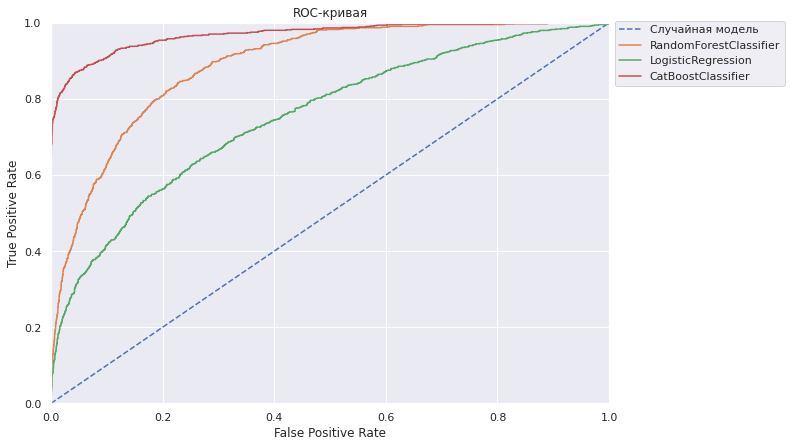

In [78]:
# Построим ROC-кривую и изобразим её на графике и посчитаем AUC-ROC

# ROC-кривая RandomForestClassifier
fpr_forest, tpr_forest, thresholds = roc_curve(target_train,
                                         forest_cv.predict_proba(features_train)[:, 1])


# ROC-кривая LogisticRegression
fpr_lr, tpr_lr, thresholds = roc_curve(target_train, lr_cv.predict_proba(features_train)[:, 1])

# ROC-кривая CatBoostClassifier
fpr_cat, tpr_cat, thresholds = roc_curve(target_cat_train, cat_cv.predict_proba(features_cat_train)[:, 1])


plt.figure()

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_forest,tpr_forest)
plt.plot(fpr_lr,tpr_lr)
plt.plot(fpr_cat,tpr_cat)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','RandomForestClassifier','LogisticRegression','CatBoostClassifier'),
           bbox_to_anchor=(1, 1.02), loc='upper left') 
plt.show()

Мы проверили 3 модели с подбором лучших гиперпараметров и может сделать следующие выводы:
- Лучше всех себя показал **яндексовский классификатор** с гиперпараметром: `'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'depth': 2, 'iterations': 1200, 'l2_leaf_reg': 2, 'learning_rate': 0.3, 'random_seed': 61123, 'subsample': 0.5`. Показатель метрики качества **AUC-ROC** на обучающей выборке **0.911**, значение метрики F1 = 0.839.
- на втором месте "Решающий лес" с результатом AUC-ROC на обучающей выборке 0.8169, при сбалансированном весе, глубине = 8, кол-ве деревьев =  150, min_samples_leaf = 10, min_samples_split = 2, random_state = 61123.
- худшая модель Логистическая регрессия с результатом 0,744. Даже поиск лучших гиперпараметров не помог добиться лучших результатов, при том, что мы подготавливали данные с помощью энкодинга.

Можно предположить, что бустинговая модель лучше определяет бинарную классификацию, а так же сама кодирует данные. На графике ROC-кривой отлично виализуруется преимущество CatBoostClassifier.

По матрице ошибок видим, что CatBoost предсказывает меньше False (как False Negative, так и False Positive) ответов, так и больше правильных прогнозов. Что нам и показывает ROC-кривая (По горизонтали доля ложноположительных ответов (FPR), а по вертикали — доля истинно положительных ответов (TPR)). Минус данной модели - долгое время обучения. 

## Выбор лучшей модели

Так как модель **CatBoostClassifier** показало лучшие результаты с результатами AUC-ROC на обучающей выборке 0.911, при параметрах *'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'depth': 2, 'iterations': 1200, 'l2_leaf_reg': 2, 'learning_rate': 0.3, 'random_seed': 61123, 'subsample': 0.5*, то финальное тестирование будем проводить на данной модели.

In [79]:
%%time

# Используем лучшие гиперпараметры

cat.set_params(**cat_best_params)
cat.fit(features_cat_train, target_cat_train, cat_features=category_features, verbose=False)
final_predict = cat.predict_proba(features_cat_test)[:, 1]
test_roc = roc_auc_score(target_cat_test, final_predict)
cat_f1_final = f1_score(target_cat_test, cat.predict(features_cat_test))
print(f'Значение метрики AUC-ROC на тестовой выборке {test_roc} для CatBoostClassifier')
print('')
print(f'Значение метрики F1 на тестовой выборке {cat_f1_final} для CatBoostClassifier')
print('')
print('Матрица ошибок\n', confusion_matrix(target_cat_test, cat.predict(features_cat_test)))

Значение метрики AUC-ROC на тестовой выборке 0.9250375336870669 для CatBoostClassifier

Значение метрики F1 на тестовой выборке 0.7355371900826445 для CatBoostClassifier

Матрица ошибок
 [[1455   14]
 [ 114  178]]
CPU times: user 3.44 s, sys: 147 ms, total: 3.58 s
Wall time: 4.4 s


<Figure size 1008x432 with 0 Axes>

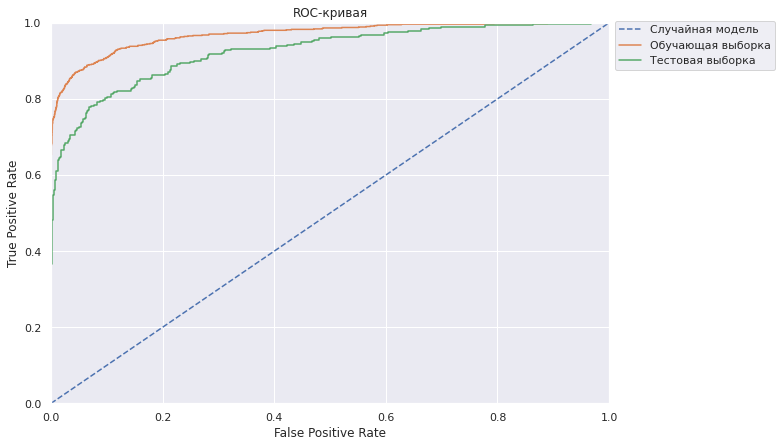

In [80]:
# Построим ROC-кривую

# ROC-кривая на обучающей
fpr_valid, tpr_valid, thresholds = roc_curve(target_cat_train, cat_cv.predict_proba(features_cat_train)[:, 1])

# ROC-кривая для теста
fpr_test, tpr_test, thresholds = roc_curve(target_cat_test, final_predict)

plt.figure()

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_valid,tpr_valid)
plt.plot(fpr_test,tpr_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Обучающая выборка','Тестовая выборка'),
           bbox_to_anchor=(1, 1.02), loc='upper left') 
plt.show()

In [85]:
# Посмотрим на важные признаки

importances_data = pd.DataFrame(cat_cv.best_estimator_.feature_importances_, index = features_cat_test.columns, columns=['importances'])
importances_data = importances_data.sort_values(by='importances', ascending=False)
importances_data

,importances
total_days,72.489168
monthly_charges,8.200055
type,5.444478
multiple_lines,2.496620
payment_method,2.386340
partner,1.723158
online_backup,1.302080
streaming_movies,0.932981
device_protection,0.854866
internet_service,0.787083


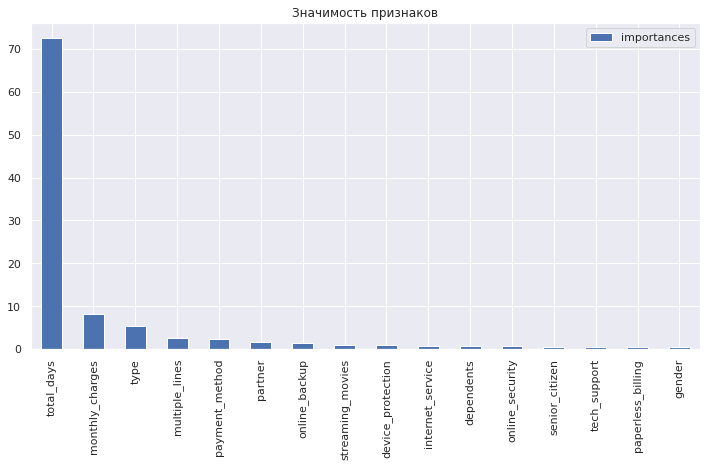

In [86]:
# отобразим на графике
importances_data.plot(kind='bar', figsize=(12, 6), title='Значимость признаков')
plt.show()

## Общий вывод и рекомендации заказчику

**Вывод:**


Для оператора связи «ТелеДом», мы разработали модель, которая поможет определить пользователей, которые могут разорвать абонентский договор. Таким клиентам сотрудники оператора смогут предлагать промокоды и специальные условия.

С помощью предоставленных наборов данных с информацией о договоре, персональными данными клиентов, информацией об интернет-услугах и услугах телефонии, мы смогли проанализировать и предобработать датафрейм. В нем было 7043 данных о клиентах, из которых 15,6% покинули оператора. Мы объединили данные, привели их к стандарту PEP8 и корректному типу данных, логическим путем заполнили пропуски в объединенных данных. Пользовались условием, что если клиент отсутствовал в какой-то базе услуг, то данными услугами он и не пользовался. Сгенерировали новые признаки: продолжительность действия договора и целевой признак ухода клиента. 

Провели визуальный исследовательский анализ. Посмотрели распределения признаков и их взаимосвязи с целевыми значениями. Кроме визуального взгляда взаимосвязей использовали корреляцию Phik и Пирсона. Пришли к следующим выводам:
- Выборка у нас маленькая и местами неравномерна
- Самый популярный способ оплаты - помесячный, процент ухода клиентов с данным способом оплаты ниже; 60% клиентов имеют электронный расчётный лист; клиенты предпочитают электронный чек, процентное соотношение ухода таких клиентов, а так же тех, кто получает чек по почте, ниже
-  Равномерное гендерное распределение и маленький процент пожилой аудитории, но процент ухода возрастных клиентов выше; равномерное распределение между клиентами в браке и холостыми, но процент ухода замужних\женатых выше; у 30% клиентов есть дети, и их наличие не влияет на уход из компании
- Fiber optic пользуется популярностью, при этом клиенты не использующие интернет более лояльные; Дополнительные опции не пользуются "бешенной" популярностью, доля подключения не превышает 30-35% (в редких случаях 38-42%), при этом в целом количественное и процентное соотношение ушедших выше
- Ежемесячные расходы у оставшихся клиентов адекватны и не вызывают желания пересмотреть условия оператора. Такие клиенты дольше задерживаются в компании
- Выявили зависимости между признаками, но утверждать прямая она или имеет влияние третьей стороны - мы не можем. Корреляция наблюдается между: кол-вом дней и общими расходами клиентов, общими и среднемесячными тратами, типом оплаты и типом подключения, нахождением в браке и наличием детей, выделенной линией технической поддержки и блокировкой опасных сайтов или наличием антивируса, наличием антивируса и подключением стримингового телевидения и каталогом фильмов.

После данного анализа избавились от мультикорреальных признаков и данных о времени (начало и конец договора).

Далее с помощью кодирования (One-Hot Encoding и StandardScaler), масштабирования данных мы сравнили три модели обучения. Для этого мы разделили наш датафрейм на две выборки, 25% от общих данных мы оставили на тестовую проверку. На первой выборке обучали модели, на кросс-валидации подбирали лучшие гиперпараметры и проверяли качество метрики - AUC-ROC (Receiver Operating Characteristic — Area Under the Curve) – это метрика, которая используется для оценки качества модели классификации. Она показывает, насколько хорошо модель разделяет положительные и отрицательные примеры. ROC-AUC измеряется от 0 до 1, при этом чем выше показатель ROC-AUC, тем лучше работает модель. Критерий AUC-ROC устойчив к несбалансированным классам и может быть интерпретирован как вероятность того, что случайно выбранный positive объект будет проранжирован классификатором выше (будет иметь более высокую вероятность быть positive), чем случайно выбранный negative объект. Посмотрели модели: CatBoostClassifier, RandomForestClassifier, LogisticRegression.

При обучении и подбору гиперпараметров, мы получили такие результаты:

`+------------------------+--------------------+---------------------+
|         model          |      AUC-ROC       |          F1         |
+------------------------+--------------------+---------------------+
| RandomForestClassifier | 0.8169340152859895 |  0.5650224215246638 |
|   LogisticRegression   | 0.744864601247505  | 0.41055294542826165 |
|   CatBoostClassifier   | 0.9113676182571587 |  0.8391211906449327 |
+------------------------+--------------------+---------------------+`

Лучшей моделью оказалась **CatBoostClassifier**, со следующими значениями гиперпараметров: `'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'depth': 2, 'iterations': 1200, 'l2_leaf_reg': 2, 'learning_rate': 0.3, 'random_seed': 61123, 'subsample': 0.5`, где:
- boosting_type – это тип бустинга, который используется при обучении, Plain дает качество хуже, но работает быстрее
- bootstrap_type – это тип сэмплирования, когда мы строим дерево, построение идет не по всем объектам обучающей выборки, а по нескольким объектам
- subsample – это вероятность, по которой будет выбираться каждый объект для построения дерева.
- L2_leaf_reg – регуляризация L2, она делает так, чтобы листья в дереве не становились бесконечностью
- depth - глубина дерева, iterations - кол-во итераций, learning_rate - скорость обучения

Результат метрики качества **AUC-ROC** на тестовой выборке равной **0,925**. Таким образом выполнили поставленную задачу: Построить модель со значением метрики качества AUC-ROC более 0.85.

Матрица ошибок показывает, что на 1455 True Negative ответа у нас только 14 False Positiv, а на 178 True Positiv ответа 114 False Negative. Минусами данной модели можно выделить долгое обучение, из плюсов: CatBoost не требует предварительного кодирования данных, модель весьма успешно справляется с этим сама.

Также выделили список признаков, повлиявших на результаты нашей модели:

`total_days	- 72.489168
monthly_charges -	8.200055
type -	5.444478
multiple_lines -	2.496620
payment_method -	2.386340
partner -	1.723158
online_backup -	1.302080
streaming_movies -	0.932981
device_protection -	0.854866
internet_service -	0.787083
dependents -	0.707770
online_security -	0.597335
senior_citizen -	0.543131
tech_support -	0.528526
paperless_billing -	0.510257
gender -	0.496152`

Как видим, мы подтвердили свои изначальные предположения о малом влияние гендерной принадлежности и части пакетов интернет-услуг. Остальные параметры, такие как total_days, monthly_charges, streaming_movies, type подтверждаются проверенной коррелярностью признаков.

Мы отклонились от начального плана выполнения работы: выяснили, что изначальное объединение данных и затем обработка данных приоритетней и удобнее в нашем случае. Остальные шаги удалось выполнить в полной мере.


Возможно мы могли еще улучшить показатели модели, если бы обладали более детальной информацией. К примеру числовой: возрастные диапазоны клиентов, объемы интернет-трафика и кол-во минут, информацией о уровне качества связи и предоставляемых услуг. Ориентируясь на собранную информацию, хотелось бы порекомендовать оператору пересмотреть дополнительные услуги, клиенты берут их нечасто и они не являются "удерживающим якорем" в компании, видимо качество несопоставимо с ценой. Так же возможно ввести акционные продукты и скидки за приобретения нескольких пакетов услуг за раз.
 